#Before Running

Make sure to directly download dataset file from https://www.kaggle.com/datasets/mathchi/diabetes-data-set and load it in Colab to have a complete view of our data visualization.


Alternately, if you don't want to download and run it, Remember to upload your kaggle.json file (kaggle account required) to colab after you run the following channel.

## Install all key packages

In [ ]:
# Install key packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, StratifiedKFold, cross_val_score
from sklearn.naive_bayes import GaussianNB, BernoulliNB, ComplementNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, cohen_kappa_score, silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from statistics import mean, stdev
import warnings

warnings.filterwarnings('ignore')

In [ ]:
# Install dataset
!pip install kaggle
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d akshaydattatraykhare/diabetes-dataset

!unzip diabetes-dataset.zip

import pandas as pd
df = pd.read_csv("diabetes.csv")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving diabetes.csv to diabetes.csv
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.9/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.9/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
unzip:  cannot find or open diabetes-dataset.zip, diabetes-dataset.zip.zip or diabetes-dataset.zip.ZIP.


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#Before Running

Make sure to directly download dataset file from https://www.kaggle.com/datasets/mathchi/diabetes-data-set and load it in Colab to have a complete view of our data visualization.


Alternately, if you don't want to download and run it, Remember to upload your kaggle.json file (kaggle account required) to colab after you run the following channel.

# Instructions
By now, you have seen the majority of code required for this project in class or in your homework assignment. You are to complete a series of parts for this project. They include:

1.   Describing your data (no code)
2.   Data Exploration
3.   Supervised Learning
4.   Unsupervised Learning

Within each section, you are asked to perform a series of analyses. Work smart. Work with each other. Be sure to adapt prior code.

**For the project, I have provided specific instructions but there is no "cheat sheet." The questions are adapted from prior scripts and/or assignments. This should not surprise you. Good luck!**



# Part 1: Describe your data (18 points)
This is conceptual. Please write full responses to the questions. Otherwise, points will be deducted.



**1. Desribe your dataset in 3-4 sentences (5 points)**

The dataset is sourced from the National Institute of Diabetes and Digestive and Kidney Diseases and aims to predict whether a patient has diabetes using diagnostic measurements. The dataset only includes female patients who are at least 21 years old and of Pima Indian heritage. It contains several medical predictor variables and one target dependent variable, which is the patient's outcome

**2. What research question are you trying to answer? (2 points)**

Can we accurately predict the presence of diabetes in patients of Pima Indian heritage based on their diagnostic measurements?

**3. What are your features? How many are there in total? (2 points)**

There are a total of 8 features in this dataset.


- Pregnancies
- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI
- DiabetesPedigreeFunction
- Age


**4. What is your label? (2 points)**

My label is **Outcome** column in the dataset.

**5. If your label is a continuous variable, how will you dichtomoize it (i.e., turn it into a 0/1 indicator)? (2 points)**

My target variable is already in binary form. 1 represents diabetic patients and 0 a person without diabetes.

**6. Please provide a hypothesis as to what you believe the relationship between your features and label to be? Please provide a justficiation for your hypothesis (this does not require any research; just use your logic; this should be 4-5 sentences) (5 points)**

Based on medical knowledge and logical reasoning, we can hypothesize that some of the features in the dataset, such as high glucose levels, high BMI, and high blood pressure, may be positively associated with the presence of diabetes. Similarly, low insulin levels may also be associated with diabetes. The number of pregnancies and age may also be relevant factors, as age is a known risk factor for developing diabetes, and the number of pregnancies has been suggested to have an impact on insulin sensitivity.

# Part 2: Data Exploration (42 points)
Please answer all questions. Make sure everything is displayed so the TA's can easily grade each question. HINT: week 9 python script for Boston Housing data will be very helpful for this section.

**1. Import data set. Show the first five rows of data (2 points)**

**2. Display dimension of the data (2 points)**

In [ ]:
df.shape#shows the number of rows and columns in the dataset

(768, 9)

**3. Summarize the data to see the distribution of data (all of your features and label) (2 points)**

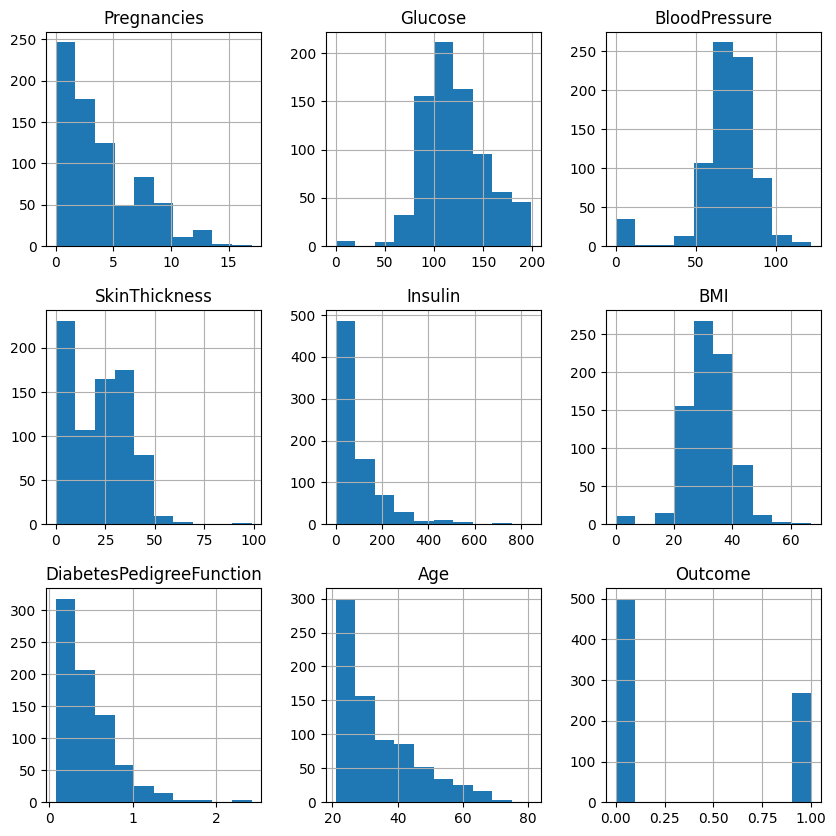

In [ ]:
# Plot histograms for all variables
df.hist(figsize=(10,10))
plt.show()

**4. Display the boxplots of your data (all of your features and label) (2 points)**

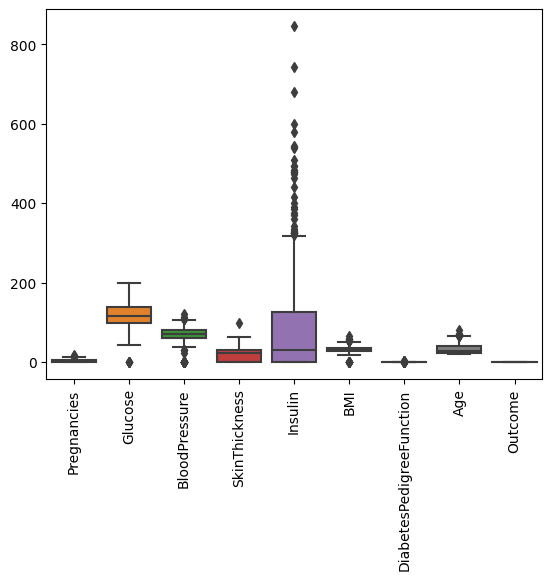

In [ ]:
# Create boxplots for all features and label
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

**5. Based on your boxplots in Q4, do any of your variables appear to have outliers? If yes, which ones? (2 points)**

All of the features appear to display outliers, the label 'outcome' is binary so does not appear explanitory.

**6. Write a program to show exactly what percentage of data are outliers (outliers are defined as variable 1.5 standard deviations above and below the IQR) (4 points)**

In [ ]:
# Select only numerical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate IQR for each feature
q1 = df[num_cols].quantile(0.25)
q3 = df[num_cols].quantile(0.75)
iqr = q3 - q1

# Define upper and lower limits for outliers
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

# Calculate percentage of outliers for each feature
for col in num_cols:
    num_outliers = len(df[(df[col] > upper_limit[col]) | (df[col] < lower_limit[col])])
    percent_outliers = num_outliers / len(df) * 100
    print(f"{col}: {percent_outliers:.2f}%")

Pregnancies: 0.52%
Glucose: 0.65%
BloodPressure: 5.86%
SkinThickness: 0.13%
Insulin: 4.43%
BMI: 2.47%
DiabetesPedigreeFunction: 3.78%
Age: 1.17%
Outcome: 0.00%


**7. Based on the program you wrote in Q6, which variables have a large percentage of outliers? (2 points)**

By using 3.5% of outliers as our cutoff point, we found that:

BloodPressure varaiable has large percentage (5.86%) of outliers.

The Insulin variable also has large outliers percentage (4.43%).

The DiabetesPedigreeFunction variable has large outliers percentage (3.78%).

**8. Visualize the distributions of all of your variables (i.e., display histograms) (2 points)**

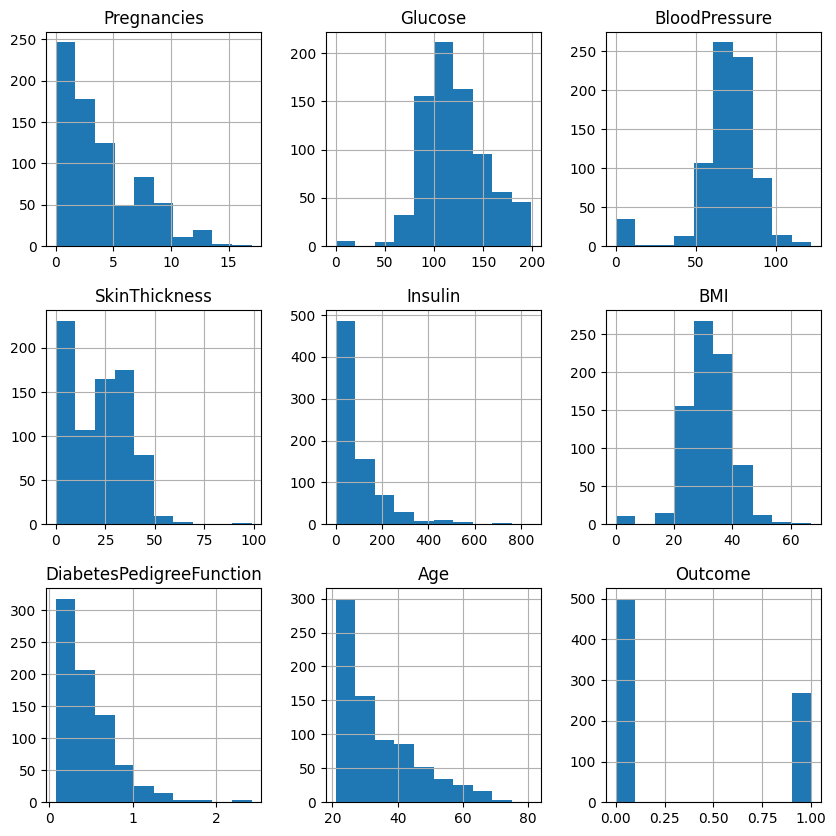

In [ ]:
# Plot histograms for all variables
df.hist(figsize=(10,10))
plt.show()

**9. What do you notice about the scale for your features? (2 points)**

All of the features are in different units and scales, which creates concerns regarding the interpretation of data and comparison of features. Therefore normalizing these variables using MinMaxScaler() is an appropriate step to improve the performance of the machine learning algorithms. The standardization process will do so by reducing the impact of the disparate scales of the input features, and ultimately improving the convergence of the optimization algorithms used in some machine learning models.

**10. Standardize your features only and display distributions for all variables (features + Label)? (2 points)**

**moving forward, you only use the standardized version of your features for all subsequent analysis**

In [ ]:
numerical_columns = df.select_dtypes(include=['float64', 'int64'])
scaler = MinMaxScaler()
normalized_columns = scaler.fit_transform(numerical_columns)
normalized_df = pd.DataFrame(normalized_columns, columns=numerical_columns.columns)
non_numerical_columns = df.select_dtypes(exclude=['float64', 'int64'])
df1 = pd.concat([normalized_df, non_numerical_columns], axis=1)

**11. Visualize the distributions of all of your standardized variables (i.e., display histograms) (2 points)**

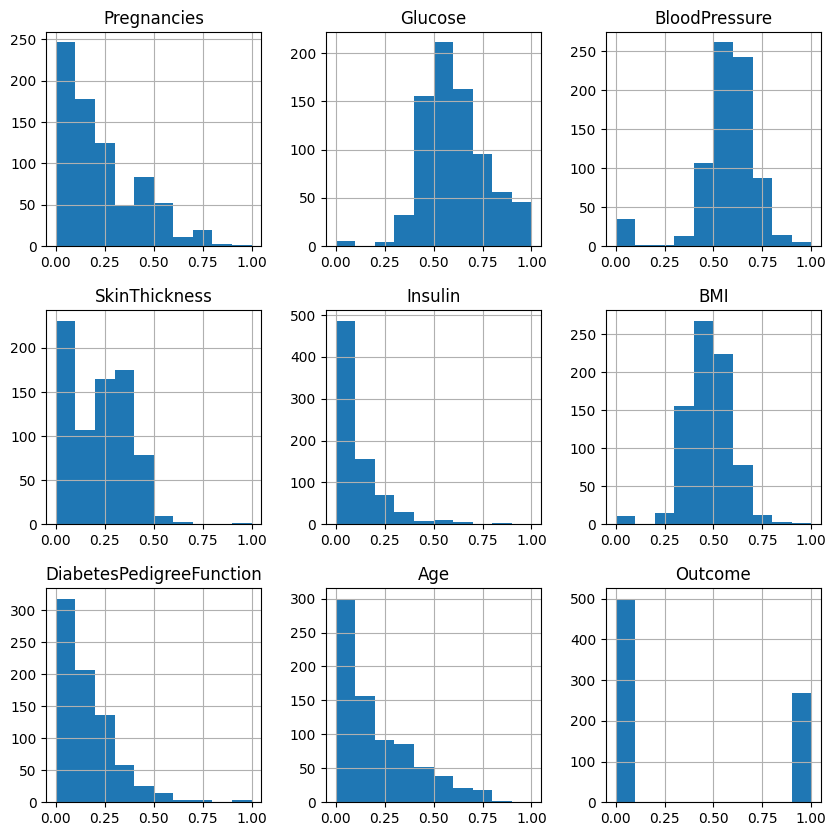

In [ ]:
df1.hist(figsize=(10,10))
plt.show()

**12. Which variables appear to be normally distributed? Which are left- vs. right-skewed? Which variables have a bimodal distribution? (4 points)**

1.   **Normally distributed**: Glucose, BloodPressure, BMI
2.   **Left-skewed**: None
3.   **Right-skewed**: Pregnancies, SkinThickness, Insulin, DiabetesPedigreeFunction, Age
4.   **Bimodal distribution**: Outcome




**13. Display a correlation matrix for all of your variables (both labels and features) (2 points)**

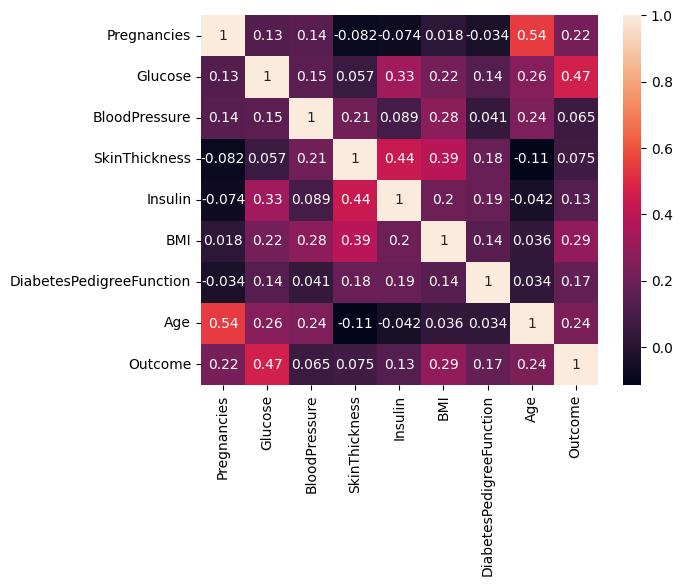

In [ ]:
corr_matrix = df1.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
df1.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


**14. Which features are most correlated with your label (0.5 or greater)? (2 points)**

If we use a 0.5 or greater threshold, then none of our features are highly correlated with our label, but here are the top three features with relatively high correlation with the label (with 0.23 as cutoff point):
- Glucose (0.47)
- BMI (0.29)
- Age (0.24)

**15. Which features are most correlated with each other (0.5 or greater)? (2 points)**

If we use a 0.5 or greater threshold, then there is only **Pregnancies and Age** with 0.55 correlations that's high. Besides that, there are also the following features that are correlated with each other (Using 0.27 as threshold):
- BloodPressure and BMI (0.28)
- SkinThickness and BMI (0.39)
- Insulin and Glucose (0.33)

**16. What does feature correlation raise concerns of? What is one (unsupervised learning) method that will ensure no features are correlated? (2 points)**

- Feature correlation raises concerns of multicollinearity, which is a phenomenon in which two or more features in a dataset are highly correlated with each other. This can lead to unstable and unreliable estimates of model parameters, and can also make it difficult to interpret the relative importance of each feature.

- One unsupervised learning method that can ensure no features are correlated is Principal Component Analysis (PCA). PCA is a dimensionality reduction technique that finds a new set of uncorrelated variables called principal components. The first principal component accounts for as much of the variability in the data as possible, and each succeeding component accounts for as much of the remaining variability as possible. By selecting only the principal components that explain most of the variability in the data, we can create a new set of uncorrelated features that can be used for modeling.

**18. Visualize a scatterplot of your features and labels. One plot per feature. X-axis should display the feature. y-axis the label? (2 points)**

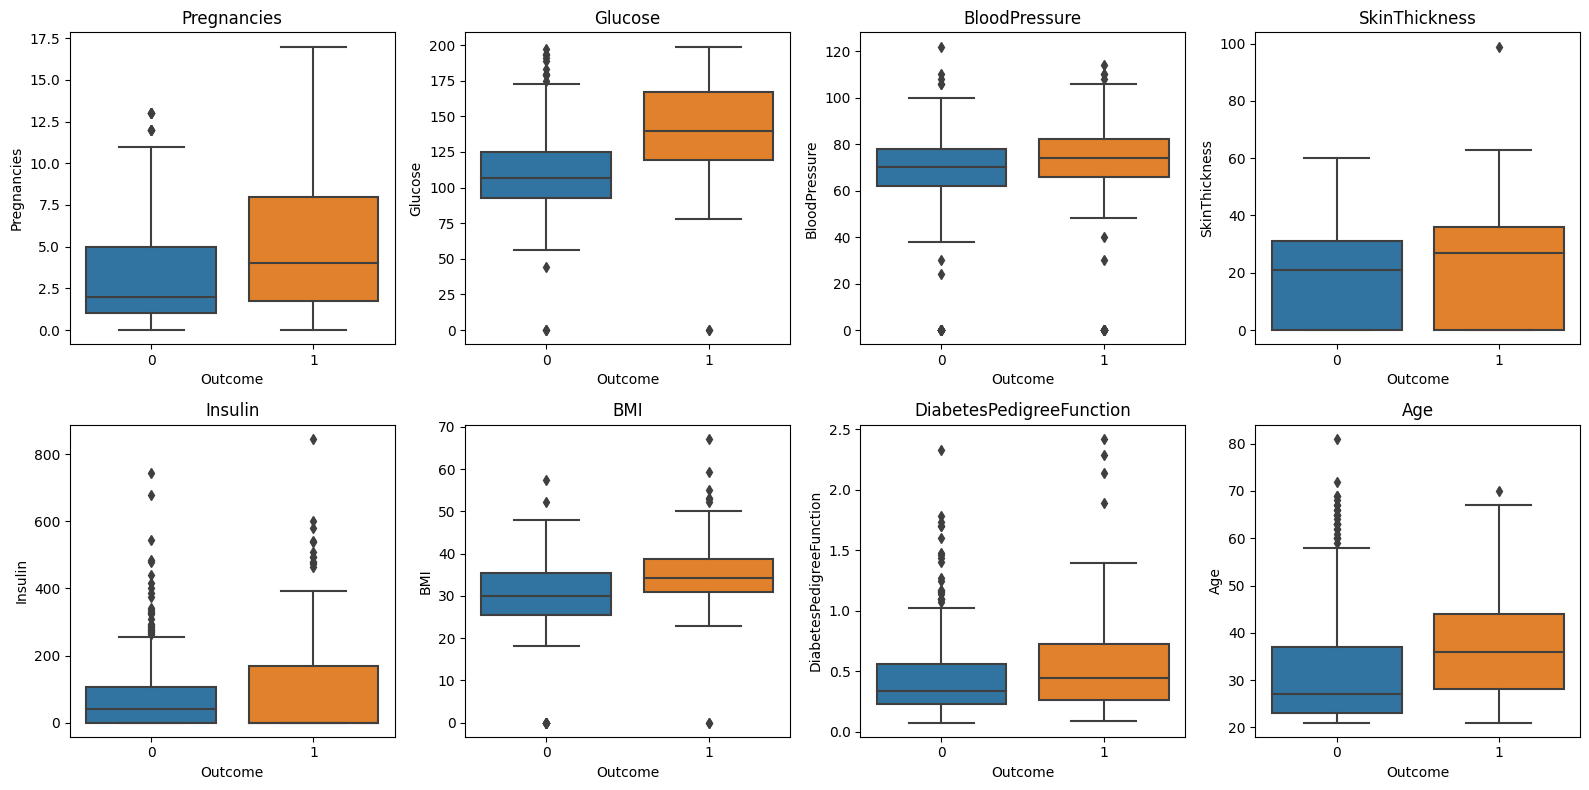

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

for i, col in enumerate(df.columns[:-1]):
    sns.boxplot(x='Outcome', y=col, data=df, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

**18. Based on your exploratory analysis, if you had to select a subset of features, which features would you select going forward? Please provide a justification. (4 points)**

- Glucose
- BMI
- Age

These features have the highest correlation with the label Outcome, with correlation coefficients of 0.47, 0.29, and 0.24 respectively. Additionally, these features do not have high correlation with each other, with correlation coefficients ranging from -0.07 to 0.39.

# Part 3: Supervised learning (45 points)
HINT: Adapt prior code! Assignment 5 will be very helpful. **USE THE STANDARDIZED VERSION OF YOUR FEATURES**

a) Compare Naïve Bayes, Logistic Regression, SVMs, Decision Trees, Random Forests, and Adaboost (6 total alogirthms).
*   Use the binary version of your label. Remember that you converted your continuous outcome to a binary variable above.
*   Use all your features in the model (do not use the subset)
*   You are likely wondering when you learned Adaboost. You watched a video on it. It is a boosting method. However, you did not learn how to apply it in Python. Still, I want to see that you can continue to build on your machine learning knowledge outside of the classroom. This is your opportunity to do so. You have all the pre-requisite knowledge.

b) For each model above, I want you to perform the following optimizations:
Part 2. Subset of features included in the model.

*   Hold one out (80/20 train/test split) (this is your baseline model)
*   Hold one out (90/10 train/test split)
*   5-fold cross-validation (80/20 train/test split)
*   10-fold cross-validation (80/20 train/test split)
*   10-fold stratified cross-validation (80/20 train/test split)
*   10-fold cross-validation with subset of features identified above (80/20 train/test split)
*   Select **two** hyperparameter tunings for each of these models. For example, for Logistic Regresion, you might select the L1 and L2 regularization. For Bayes, you might use two other distributions. For SVM, this could be to evaluate different kernels including a polynomial kernel and a radial basis function kernel. For decision trees / random forest, you might have to tweak node / leaf sizes. You will have to look into hyperaparemter tunings for Adaboost and that is ok! **Use 10-fold cross-validation (80/20 train/test split) with ALL features.**

**BaseLine Models here:**

 Naïve Bayes, Logistic Regression, SVMs, Decision Trees, Random Forests, and Adaboost. I suggest using simple 80/20 train test split for the above algorithm as baseline models.

In [ ]:
# seperating the independent and target features from the dataset
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [ ]:
from sklearn.metrics import accuracy_score, cohen_kappa_score

# Baseline models
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
nb = GaussianNB()
lr = LogisticRegression(random_state=42)
svm = SVC(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
ab = AdaBoostClassifier(random_state=42)

# Train models
nb.fit(X_train, y_train)
lr.fit(X_train, y_train)
svm.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
ab.fit(X_train, y_train)

# Make predictions on test set
nb_pred = nb.predict(X_test)
lr_pred = lr.predict(X_test)
svm_pred = svm.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
ab_pred = ab.predict(X_test)

# Calculate accuracy scores and kappa scores
nb_acc = accuracy_score(y_test, nb_pred)
lr_acc = accuracy_score(y_test, lr_pred)
svm_acc = accuracy_score(y_test, svm_pred)
dt_acc = accuracy_score(y_test, dt_pred)
rf_acc = accuracy_score(y_test, rf_pred)
ab_acc = accuracy_score(y_test, ab_pred)

nb_kappa = cohen_kappa_score(y_test, nb_pred)
lr_kappa = cohen_kappa_score(y_test, lr_pred)
svm_kappa = cohen_kappa_score(y_test, svm_pred)
dt_kappa = cohen_kappa_score(y_test, dt_pred)
rf_kappa = cohen_kappa_score(y_test, rf_pred)
ab_kappa = cohen_kappa_score(y_test, ab_pred)

# Print results
print("Naïve Bayes accuracy:", nb_acc)
print("Naïve Bayes kappa score:", nb_kappa)
print("Logistic Regression accuracy:", lr_acc)
print("Logistic Regression kappa score:", lr_kappa)
print("SVM accuracy:", svm_acc)
print("SVM kappa score:", svm_kappa)
print("Decision Tree accuracy:", dt_acc)
print("Decision Tree kappa score:", dt_kappa)
print("Random Forest accuracy:", rf_acc)
print("Random Forest kappa score:", rf_kappa)
print("Adaboost accuracy:", ab_acc)
print("Adaboost kappa score:", ab_kappa)


Naïve Bayes accuracy: 0.7662337662337663
Naïve Bayes kappa score: 0.4990059642147118
Logistic Regression accuracy: 0.7467532467532467
Logistic Regression kappa score: 0.45508982035928147
SVM accuracy: 0.7662337662337663
SVM kappa score: 0.46496815286624205
Decision Tree accuracy: 0.7467532467532467
Decision Tree kappa score: 0.4678362573099416
Random Forest accuracy: 0.7207792207792207
Random Forest kappa score: 0.3943661971830986
Adaboost accuracy: 0.7337662337662337
Adaboost kappa score: 0.4225352112676056


**Optimizations here:**

**Hold one out (80/20 train/test split) for decision tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import LeaveOneOut, train_test_split
from sklearn.metrics import accuracy_score, cohen_kappa_score

# create a decision tree model
model1 = DecisionTreeClassifier(random_state=42)

# create a hold-one-out cross-validation object
loo = LeaveOneOut()

y_true, y_pred = [], []
for train_index, test_index in loo.split(df1):
    X_train, X_test = df1.loc[train_index], df1.loc[test_index]
    y_train, y_test = X_train.pop('Outcome'), X_test.pop('Outcome')

    # split the training set into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # fit the model on the training set
    model1 = model1.fit(X_train, y_train)

    # predict the labels of the validation set
    y_pred_val = model1.predict(X_val)

    # compute the accuracy on the validation set
    accuracy_val = accuracy_score(y_val, y_pred_val)

    # predict the label of the test set
    y_pred_test = model1.predict(X_test)

    # append the predicted and true labels to two lists
    y_pred.append(y_pred_test)
    y_true.append(y_test)

# compute the accuracy and kappa score on the test set
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy for the testing is: {accuracy:.4f}")

kappa = cohen_kappa_score(y_true, y_pred)
print(f"Kappa score for the testing is: {kappa:.4f}")


Accuracy for the testing is: 0.6992
Kappa score for the testing is: 0.3420


**Hold one out (80/20 train/test split) for Logistic Regressions**

In [ ]:
# create a Logistic Regression model
lr = LogisticRegression(max_iter = 5000, random_state=42)

# create a hold-one-out cross-validation object
loo = LeaveOneOut()

y_true, y_pred = [], []
for train_index, test_index in loo.split(df1):
    X_train, X_test = df1.loc[train_index], df1.loc[test_index]
    y_train, y_test = X_train.pop('Outcome'), X_test.pop('Outcome')

    # split the training set into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # fit the model on the training set
    lr = lr.fit(X_train, y_train)

    # predict the labels of the validation set
    y_pred_val = lr.predict(X_val)

    # compute the accuracy on the validation set
    accuracy_val = accuracy_score(y_val, y_pred_val)

    # predict the label of the test set
    y_pred_test = lr.predict(X_test)

    # append the predicted and true labels to two lists
    y_pred.append(y_pred_test)
    y_true.append(y_test)

# compute the accuracy on the test set
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy for the testing set is: {accuracy:.4f}")

kappa = cohen_kappa_score(y_true, y_pred)
print(f"Kappa score for the testing is: {kappa:.4f}")

Accuracy for the testing set is: 0.7643
Kappa score for the testing is: 0.4432


**Hold one out (80/20 train/test split) for Random Forest**

In [ ]:
# create a Random Forest model
rf = RandomForestClassifier(n_estimators=100, min_samples_leaf=10, max_depth=4, min_samples_split=6, random_state=42)

# create a hold-one-out cross-validation object
loo = LeaveOneOut()

y_true, y_pred = [], []
for train_index, test_index in loo.split(df1):
    X_train, X_test = df1.loc[train_index], df1.loc[test_index]
    y_train, y_test = X_train.pop('Outcome'), X_test.pop('Outcome')

    # split the training set into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # fit the model on the training set
    rf = rf.fit(X_train, y_train)

    # predict the labels of the validation set
    y_pred_val = rf.predict(X_val)

    # compute the accuracy on the validation set
    accuracy_val = accuracy_score(y_val, y_pred_val)

    # predict the label of the test set
    y_pred_test = rf.predict(X_test)

    # append the predicted and true labels to two lists
    y_pred.append(y_pred_test)
    y_true.append(y_test)

# compute the accuracy on the test set
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy for the testing set is: {accuracy:.4f}")

kappa = cohen_kappa_score(y_true, y_pred)
print(f"Kappa score for the testing is: {kappa:.4f}")

Accuracy for the testing set is: 0.7669
Kappa score for the testing is: 0.4514


**Hold one out (80/20 train/test split) for SVM**

In [ ]:
from sklearn.metrics import accuracy_score, cohen_kappa_score

classifiers = {
    "Linear SVM": LinearSVC(random_state=42),
    "RBF SVM": SVC(kernel='rbf',random_state=42),
    "Poly SVM": SVC(kernel='poly',random_state=42)
}

X = df1.iloc[:, :-1]
y = df1.iloc[:,-1]

# split the training set into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for name, classifier in classifiers.items():
    print(f"Training {name}...")
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    kappa = cohen_kappa_score(y_pred, y_test)
    print(f"Test accuracy for {name}: {accuracy:.4f}")
    print(f"Kappa score for {name}: {kappa:.4f}")


Training Linear SVM...
Test accuracy for Linear SVM: 0.7662
Kappa score for Linear SVM: 0.4909
Training RBF SVM...
Test accuracy for RBF SVM: 0.7468
Kappa score for RBF SVM: 0.4371
Training Poly SVM...
Test accuracy for Poly SVM: 0.7792
Kappa score for Poly SVM: 0.5031


**Hold one out (80/20 train/test split) for Naive Bayes**

In [ ]:
from sklearn.metrics import accuracy_score, cohen_kappa_score

classifiers = {
    "Bernoulli NB": BernoulliNB(),
    "Complement NB": ComplementNB(),
    "Multinomial NB": MultinomialNB()
}

X = df1.iloc[:, :-1]
y = df1.iloc[:,-1]

# split the training set into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for name, classifier in classifiers.items():
    print(f"Training {name}...")
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    kappa = cohen_kappa_score(y_pred, y_test)
    print(f"Test accuracy for {name}: {accuracy:.4f}")
    print(f"Kappa score for {name}: {kappa:.4f}")


Training Bernoulli NB...
Test accuracy for Bernoulli NB: 0.6623
Kappa score for Bernoulli NB: 0.0877
Training Complement NB...
Test accuracy for Complement NB: 0.6039
Kappa score for Complement NB: 0.1867
Training Multinomial NB...
Test accuracy for Multinomial NB: 0.6429
Kappa score for Multinomial NB: 0.0000


**Hold one out (80/20 train/test split) for Adaboost**

In [ ]:
# create adaboost model set
clf = AdaBoostClassifier(random_state=42)

# create a hold-one-out cross-validation object
loo = LeaveOneOut()

y_true, y_pred = [], []
for train_index, test_index in loo.split(df1):
    X_train, X_test = df1.loc[train_index], df1.loc[test_index]
    y_train, y_test = X_train.pop('Outcome'), X_test.pop('Outcome')

    # split the training set into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # fit the model on the training set
    clf = clf.fit(X_train, y_train)

    # predict the labels of the validation set
    y_pred_val = clf.predict(X_val)

    # compute the accuracy on the validation set
    accuracy_val = accuracy_score(y_val, y_pred_val)

    # predict the label of the test set
    y_pred_test = clf.predict(X_test)

    # append the predicted and true labels to two lists
    y_pred.append(y_pred_test)
    y_true.append(y_test)

# compute the accuracy on the test set
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy for the testing set is: {accuracy:.4f}")
kappa = cohen_kappa_score(y_true, y_pred)
print(f"Kappa score for the testing is: {kappa:.4f}")

Accuracy for the testing set is: 0.7422
Kappa score for the testing is: 0.4195


**Hold one out (90/10 train/test split) for Decsion Tree**

In [ ]:
# create a decision tree model
model1 = DecisionTreeClassifier(random_state=42)

# create a hold-one-out cross-validation object
loo = LeaveOneOut()

y_true, y_pred = [], []
for train_index, test_index in loo.split(df1):
    X_train, X_test = df1.loc[train_index], df1.loc[test_index]
    y_train, y_test = X_train.pop('Outcome'), X_test.pop('Outcome')

    # split the training set into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

    # fit the model on the training set
    model1 = model1.fit(X_train, y_train)

    # predict the labels of the validation set
    y_pred_val = model1.predict(X_val)

    # compute the accuracy on the validation set
    accuracy_val = accuracy_score(y_val, y_pred_val)

    # predict the label of the test set
    y_pred_test = model1.predict(X_test)

    # append the predicted and true labels to two lists
    y_pred.append(y_pred_test)
    y_true.append(y_test)

# compute the accuracy on the test set
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy for the testing is: {accuracy:.4f}")
kappa = cohen_kappa_score(y_true, y_pred)
print(f"Kappa score for the testing is: {kappa:.4f}")

Accuracy for the testing is: 0.6953
Kappa score for the testing is: 0.3294


**Hold one out (90/10 train/test split) for Logistic Regression**

In [ ]:

# create a Logistic Regression model
lr = LogisticRegression(max_iter = 5000, random_state=42)

# create a hold-one-out cross-validation object
loo = LeaveOneOut()

y_true, y_pred = [], []
for train_index, test_index in loo.split(df1):
    X_train, X_test = df1.loc[train_index], df1.loc[test_index]
    y_train, y_test = X_train.pop('Outcome'), X_test.pop('Outcome')

    # split the training set into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

    # fit the model on the training set
    lr = lr.fit(X_train, y_train)

    # predict the labels of the validation set
    y_pred_val = lr.predict(X_val)

    # compute the accuracy on the validation set
    accuracy_val = accuracy_score(y_val, y_pred_val)

    # predict the label of the test set
    y_pred_test = lr.predict(X_test)

    # append the predicted and true labels to two lists
    y_pred.append(y_pred_test)
    y_true.append(y_test)

# compute the accuracy on the test set
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy for the testing set is: {accuracy:.4f}")
kappa = cohen_kappa_score(y_true, y_pred)
print(f"Kappa score for the testing is: {kappa:.4f}")

Accuracy for the testing set is: 0.7630
Kappa score for the testing is: 0.4428


**Hold one out (90/10 train/test split) for Random Forest**

In [ ]:
# create a Random Forest model
rf = RandomForestClassifier(n_estimators=100, min_samples_leaf=10, max_depth=4, min_samples_split=6, random_state=42)

# create a hold-one-out cross-validation object
loo = LeaveOneOut()

y_true, y_pred = [], []
for train_index, test_index in loo.split(df1):
    X_train, X_test = df1.loc[train_index], df1.loc[test_index]
    y_train, y_test = X_train.pop('Outcome'), X_test.pop('Outcome')

    # split the training set into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

    # fit the model on the training set
    rf = rf.fit(X_train, y_train)

    # predict the labels of the validation set
    y_pred_val = rf.predict(X_val)

    # compute the accuracy on the validation set
    accuracy_val = accuracy_score(y_val, y_pred_val)

    # predict the label of the test set
    y_pred_test = rf.predict(X_test)

    # append the predicted and true labels to two lists
    y_pred.append(y_pred_test)
    y_true.append(y_test)

# compute the accuracy on the test set
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy for the testing set is: {accuracy:.4f}")
kappa = cohen_kappa_score(y_true, y_pred)
print(f"Kappa score for the testing is: {kappa:.4f}")

Accuracy for the testing set is: 0.7591
Kappa score for the testing is: 0.4372


**Hold one out (90/10 train/test split) for SVM**

In [ ]:
# create SVM model set
classifiers = {
    "Linear SVM": LinearSVC(random_state=42),
    "RBF SVM": SVC(kernel='rbf',random_state=42),
    "Poly SVM": SVC(kernel='poly',random_state=42)
}

X = df1.iloc[:, :-1]
y = df1.iloc[:,-1]

# split the training set into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

for name, classifier in classifiers.items():
    print(f"Training {name}...")
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    print(f"Test accuracy for {name}: {accuracy:.4f}")
    kappa = cohen_kappa_score(y_test, y_pred)
    print(f"Kappa score for {name}: {kappa:.4f}")


Training Linear SVM...
Test accuracy for Linear SVM: 0.6883
Kappa score for Linear SVM: 0.3381
Training RBF SVM...
Test accuracy for RBF SVM: 0.7403
Kappa score for RBF SVM: 0.4296
Training Poly SVM...
Test accuracy for Poly SVM: 0.7662
Kappa score for Poly SVM: 0.4778


**Hold one out (90/10 train/test split) for Naive Bayes**

In [ ]:

# create Naive Bayes model set

classifiers = {
    "Bernoulli NB": BernoulliNB(),
    "Complement NB": ComplementNB(),
    "Multinomial NB": MultinomialNB()
}

X = df1.iloc[:, :-1]
y = df1.iloc[:,-1]

# split the training set into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for name, classifier in classifiers.items():
    print(f"Training {name}...")
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    print(f"Test accuracy for {name}: {accuracy:.4f}")
    kappa = cohen_kappa_score(y_test, y_pred)
    print(f"Kappa score for {name}: {kappa:.4f}")


Training Bernoulli NB...
Test accuracy for Bernoulli NB: 0.6623
Kappa score for Bernoulli NB: 0.0877
Training Complement NB...
Test accuracy for Complement NB: 0.6039
Kappa score for Complement NB: 0.1867
Training Multinomial NB...
Test accuracy for Multinomial NB: 0.6429
Kappa score for Multinomial NB: 0.0000


**Hold one out (90/10 train/test split) for Adaboost**

In [ ]:
# create adaboost model set
clf = AdaBoostClassifier(random_state=42)

# create a hold-one-out cross-validation object
loo = LeaveOneOut()

y_true, y_pred = [], []
for train_index, test_index in loo.split(df1):
    X_train, X_test = df1.loc[train_index], df1.loc[test_index]
    y_train, y_test = X_train.pop('Outcome'), X_test.pop('Outcome')

    # split the training set into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

    # fit the model on the training set
    clf = clf.fit(X_train, y_train)

    # predict the labels of the validation set
    y_pred_val = clf.predict(X_val)

    # compute the accuracy on the validation set
    accuracy_val = accuracy_score(y_val, y_pred_val)

    # predict the label of the test set
    y_pred_test = clf.predict(X_test)

    # append the predicted and true labels to two lists
    y_pred.append(y_pred_test)
    y_true.append(y_test)

# compute the accuracy on the test set
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy for the testing set is: {accuracy:.4f}")
kappa = cohen_kappa_score(y_true, y_pred)
print(f"Kappa score for the testing is: {kappa:.4f}")

Accuracy for the testing set is: 0.7474
Kappa score for the testing is: 0.4302


**5-fold cross validation(80/20 train/test split) with Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import cohen_kappa_score
import numpy as np

# define features and labels
X = df1.iloc[:, :-1]
y = df1.iloc[:,-1]

# split the training set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define the machine learning model
dt = DecisionTreeClassifier(random_state=42)

# Create KFOLD object.
kf = KFold(n_splits=5, shuffle=True, random_state=42)
lst_accu, lst_kappa = [], []

for train_index, test_index in kf.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    dt.fit(X_train_fold, y_train_fold)
    y_pred_fold = dt.predict(X_test_fold)
    lst_accu.append(dt.score(X_test_fold, y_test_fold))
    lst_kappa.append(cohen_kappa_score(y_test_fold, y_pred_fold))

# Print the output.
print('List of possible accuracy:', lst_accu)
print('\nMaximum Accuracy That can be obtained from this model is:', max(lst_accu)*100, '%')
print('\nMinimum Accuracy:', min(lst_accu)*100, '%')
print('\nOverall Accuracy:', mean(lst_accu)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu))

print('\nList of possible kappa scores:', lst_kappa)
print('\nMaximum Kappa Score That can be obtained from this model is:', max(lst_kappa))
print('\nMinimum Kappa Score:', min(lst_kappa))
print('\nOverall Kappa Score:', mean(lst_kappa))
print('\nStandard Deviation of Kappa Score is:', stdev(lst_kappa))

List of possible accuracy: [0.7467532467532467, 0.7207792207792207, 0.7402597402597403, 0.7189542483660131, 0.7254901960784313]

Maximum Accuracy That can be obtained from this model is: 74.67532467532467 %

Minimum Accuracy: 71.89542483660131 %

Overall Accuracy: 73.04473304473305 %

Standard Deviation is: 0.01237237602823361

List of possible kappa scores: [0.4678362573099416, 0.36068739138829886, 0.4477317554240632, 0.35124741149787986, 0.4089403973509934]

Maximum Kappa Score That can be obtained from this model is: 0.4678362573099416

Minimum Kappa Score: 0.35124741149787986

Overall Kappa Score: 0.40728864259423536

Standard Deviation of Kappa Score is: 0.051518645929552014


**5-fold cross validation(80/20 train/test split) with Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import cohen_kappa_score
from statistics import mean, stdev

#define the machine learning model
lr = LogisticRegression(max_iter = 5000, random_state=42)

# Create KFOLD object.
kf = KFold(n_splits=5, shuffle=True, random_state=42)
lst_accu = []
lst_kappa = []

#define features and labels
X = df1.iloc[:, :-1]
y = df1.iloc[:,-1]

# split the training set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for train_index, test_index in kf.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    lr.fit(X_train_fold, y_train_fold)
    y_pred = lr.predict(X_test_fold)
    lst_accu.append(lr.score(X_test_fold, y_test_fold))
    lst_kappa.append(cohen_kappa_score(y_test_fold, y_pred))

# Print the output.
print('List of possible accuracy:', lst_accu)
print('\nMaximum Accuracy That can be obtained from this model is:', max(lst_accu)*100, '%')
print('\nMinimum Accuracy:', min(lst_accu)*100, '%')
print('\nOverall Accuracy:', mean(lst_accu)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu))
print('\nList of possible kappa score:', lst_kappa)
print('\nOverall Kappa Score:', mean(lst_kappa))
print('\nStandard Deviation of Kappa Scores:', stdev(lst_kappa))


List of possible accuracy: [0.7662337662337663, 0.7792207792207793, 0.7532467532467533, 0.7843137254901961, 0.7450980392156863]

Maximum Accuracy That can be obtained from this model is: 78.43137254901961 %

Minimum Accuracy: 74.50980392156863 %

Overall Accuracy: 76.56226126814363 %

Standard Deviation is: 0.016651286381418235

List of possible kappa score: [0.4694736842105264, 0.4533305491751932, 0.4467763282283985, 0.4365584198192165, 0.4132166388042088]

Overall Kappa Score: 0.44387112404750867

Standard Deviation of Kappa Scores: 0.020896082950173006


**5-fold cross validation(80/20 train/test split) with Random Forest**

In [ ]:
from sklearn.metrics import cohen_kappa_score

#define the machine learning model
rf = RandomForestClassifier(n_estimators=100, min_samples_leaf=10, max_depth=4, min_samples_split=6, random_state=42)

# Create KFOLD object.
kf = KFold(n_splits=5, shuffle=True, random_state=42)
lst_accu = []
lst_kappa = []

#define features and labels
X = df1.iloc[:, :-1]
y = df1.iloc[:,-1]

# split the training set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for train_index, test_index in kf.split(X, y):
	X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
	y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
	rf.fit(X_train_fold, y_train_fold)
	y_pred = rf.predict(X_test_fold)
	lst_accu.append(rf.score(X_test_fold, y_test_fold))
	lst_kappa.append(cohen_kappa_score(y_test_fold, y_pred))

# Print the output.
print('List of possible accuracy:', lst_accu)
print('\nMaximum Accuracy That can be obtained from this model is:',
	max(lst_accu)*100, '%')
print('\nMinimum Accuracy:',
	min(lst_accu)*100, '%')
print('\nOverall Accuracy:',
	mean(lst_accu)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu))

print('\nList of possible kappa scores:', lst_kappa)
print('\nMaximum Kappa Score That can be obtained from this model is:',
	max(lst_kappa))
print('\nMinimum Kappa Score:',
	min(lst_kappa))
print('\nOverall Kappa Score:',
	mean(lst_kappa))
print('\nStandard Deviation of Kappa Scores is:', stdev(lst_kappa))


List of possible accuracy: [0.7662337662337663, 0.7792207792207793, 0.7727272727272727, 0.7843137254901961, 0.7320261437908496]

Maximum Accuracy That can be obtained from this model is: 78.43137254901961 %

Minimum Accuracy: 73.20261437908496 %

Overall Accuracy: 76.69043374925728 %

Standard Deviation is: 0.020649613578416326

List of possible kappa scores: [0.47390396659707723, 0.43928035982008995, 0.488905746254504, 0.4365584198192165, 0.3919744111660367]

Maximum Kappa Score That can be obtained from this model is: 0.488905746254504

Minimum Kappa Score: 0.3919744111660367

Overall Kappa Score: 0.4461245807313849

Standard Deviation of Kappa Scores is: 0.037658060428770124


**5-fold cross validation(80/20 train/test split) with SVM**

In [ ]:
# create SVM model set

classifiers = {
    "Linear SVM": LinearSVC(random_state=42),
    "RBF SVM": SVC(kernel='rbf',random_state=42),
    "Poly SVM": SVC(kernel='poly',random_state=42)
}

#define features and labels
X = df1.iloc[:, :-1]
y = df1.iloc[:,-1]

# split the training set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate the classifiers using 5-fold cross-validation on the training set
for name, classifier in classifiers.items():
    scores = cross_val_score(classifier, X_train, y_train, cv=5)
    print(f"{name}: {scores.mean():.4f} (+/- {scores.std():.4f})")


#Calculate the accuracy on the test set
for name, classifier in classifiers.items():
    print(f"Training {name}...")
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    print(f"Test accuracy for {name}: {accuracy:.4f}")
    kappa = cohen_kappa_score(y_pred, y_test)
    print(f"Kappa score for the testing is: {kappa:.4f}")

Linear SVM: 0.7606 (+/- 0.0292)
RBF SVM: 0.7590 (+/- 0.0288)
Poly SVM: 0.7590 (+/- 0.0316)
Training Linear SVM...
Test accuracy for Linear SVM: 0.7662
Kappa score for the testing is: 0.4909
Training RBF SVM...
Test accuracy for RBF SVM: 0.7468
Kappa score for the testing is: 0.4371
Training Poly SVM...
Test accuracy for Poly SVM: 0.7792
Kappa score for the testing is: 0.5031


**5-fold cross validation(80/20 train/test split) with Naive Bayes**

In [ ]:
# create Naive Bayes model set

classifiers = {
    "Bernoulli NB": BernoulliNB(),
    "Complement NB": ComplementNB(),
    "Multinomial NB": MultinomialNB()
}

#define features and labels
X = df1.iloc[:, :-1]
y = df1.iloc[:,-1]

# split the training set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Evaluate the classifiers using 5-fold cross-validation on the training set
for name, classifier in classifiers.items():
    scores = cross_val_score(classifier, X_train, y_train, cv=5)
    print(f"{name}: {scores.mean():.4f} (+/- {scores.std():.4f})")

#Calculate the accuracy on the test set
for name, classifier in classifiers.items():
    print(f"Training {name}...")
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    print(f"Test accuracy for {name}: {accuracy:.4f}")
    kappa = cohen_kappa_score(y_pred, y_test)
    print(f"Kappa score for the testing is: {kappa:.4f}")

Bernoulli NB: 0.6401 (+/- 0.0143)
Complement NB: 0.6483 (+/- 0.0364)
Multinomial NB: 0.6531 (+/- 0.0034)
Training Bernoulli NB...
Test accuracy for Bernoulli NB: 0.6623
Kappa score for the testing is: 0.0877
Training Complement NB...
Test accuracy for Complement NB: 0.6039
Kappa score for the testing is: 0.1867
Training Multinomial NB...
Test accuracy for Multinomial NB: 0.6429
Kappa score for the testing is: 0.0000


**5-fold cross validation(80/20 train/test split) with Adaboost**

In [ ]:
from sklearn.metrics import cohen_kappa_score

#define the machine learning model
clf = AdaBoostClassifier(random_state=42)

# Create KFOLD object.
kf = KFold(n_splits=5, shuffle=True, random_state=42)
lst_accu = []
lst_kappa = []

#define features and labels
X = df1.iloc[:, :-1]
y = df1.iloc[:,-1]

# split the training set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for train_index, test_index in kf.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    clf.fit(X_train_fold, y_train_fold)
    y_pred = clf.predict(X_test_fold)
    lst_accu.append(clf.score(X_test_fold, y_test_fold))
    lst_kappa.append(cohen_kappa_score(y_test_fold, y_pred))

# Print the output.
print('List of possible accuracy:', lst_accu)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu))
print('\nList of possible kappa score:', lst_kappa)
print('\nOverall kappa score:',
      mean(lst_kappa))
print('\nStandard Deviation of kappa score:',
      stdev(lst_kappa))


List of possible accuracy: [0.7337662337662337, 0.7662337662337663, 0.7337662337662337, 0.7450980392156863, 0.738562091503268]

Maximum Accuracy That can be obtained from this model is: 76.62337662337663 %

Minimum Accuracy: 73.37662337662337 %

Overall Accuracy: 74.34852728970375 %

Standard Deviation is: 0.013539314260496253

List of possible kappa score: [0.4225352112676056, 0.435322876349562, 0.4189214062212405, 0.35942028985507235, 0.4370860927152318]

Overall kappa score: 0.41465717528174245

Standard Deviation of kappa score: 0.031864902973341096


**10-fold cross validation(80/20 train/test split) with Decision Tree**

In [ ]:
from sklearn.metrics import cohen_kappa_score
from statistics import stdev, mean

# Define features and labels
X = df1.iloc[:, :-1]
y = df1.iloc[:, -1]

# Define the machine learning model
dt = DecisionTreeClassifier(random_state=42)

# Create KFOLD object
kf = KFold(n_splits=10, shuffle=True, random_state=42)
lst_accu = []
lst_kappa = []

# Perform 10-fold cross-validation
for train_index, test_index in kf.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    dt.fit(X_train_fold, y_train_fold)
    y_pred = dt.predict(X_test_fold)
    lst_accu.append(accuracy_score(y_test_fold, y_pred))
    lst_kappa.append(cohen_kappa_score(y_test_fold, y_pred))

# Print the output
print("List of possible accuracies:", lst_accu)
print("Maximum accuracy that can be obtained from this model:", max(lst_accu)*100, "%")
print("Minimum accuracy:", min(lst_accu)*100, "%")
print("Overall accuracy:", mean(lst_accu)*100, "%")
print("Standard deviation of accuracy:", stdev(lst_accu))
print("List of possible kappa scores:", lst_kappa)
print("Overall kappa score:", mean(lst_kappa))
print("Standard deviation of kappa score:", stdev(lst_kappa))


List of possible accuracies: [0.7922077922077922, 0.6623376623376623, 0.6623376623376623, 0.7272727272727273, 0.7922077922077922, 0.5974025974025974, 0.7272727272727273, 0.7142857142857143, 0.631578947368421, 0.8026315789473685]
Maximum accuracy that can be obtained from this model: 80.26315789473685 %
Minimum accuracy: 59.74025974025974 %
Overall accuracy: 71.09535201640465 %
Standard deviation of accuracy: 0.07154971434280105
List of possible kappa scores: [0.551347414420976, 0.2920792079207921, 0.26070901033973415, 0.34080717488789236, 0.5510204081632653, 0.14901960784313728, 0.38540478905359177, 0.3023064250411862, 0.21359940872135996, 0.5727136431784108]
Overall kappa score: 0.3619007089570346
Standard deviation of kappa score: 0.15021233358491892


**10-fold cross validation(80/20 train/test split) with Logistic Regression**

In [ ]:
from sklearn.metrics import cohen_kappa_score

#define the machine learning model
lr = LogisticRegression(max_iter = 5000, random_state=42)

# Create KFOLD object.
kf = KFold(n_splits=10, shuffle=True, random_state=42)
lst_accu = []
lst_kappa = []

#define features and labels
X = df1.iloc[:, :-1]
y = df1.iloc[:,-1]

# split the training set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for train_index, test_index in kf.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    lr.fit(X_train_fold, y_train_fold)
    lst_accu.append(lr.score(X_test_fold, y_test_fold))
    y_pred = lr.predict(X_test_fold)
    lst_kappa.append(cohen_kappa_score(y_test_fold, y_pred))

# Print the output.
print('List of possible accuracy:', lst_accu)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu))
print('\nList of possible kappa score:', lst_kappa)
print('\nOverall Kappa Score:', mean(lst_kappa))

List of possible accuracy: [0.7272727272727273, 0.8181818181818182, 0.7402597402597403, 0.8441558441558441, 0.8311688311688312, 0.6883116883116883, 0.8311688311688312, 0.7532467532467533, 0.6973684210526315, 0.7631578947368421]

Maximum Accuracy That can be obtained from this model is: 84.4155844155844 %

Minimum Accuracy: 68.83116883116884 %

Overall Accuracy: 76.94292549555708 %

Standard Deviation is: 0.05801004341399946

List of possible kappa score: [0.3959656331714606, 0.5815217391304348, 0.3820224719101124, 0.5961538461538461, 0.6145552560646901, 0.32800000000000007, 0.5984757320497394, 0.24858757062146886, 0.3368740515933232, 0.43610882110469906]

Overall Kappa Score: 0.45182651217997744


**10-fold cross validation(80/20 train/test split) with Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import cohen_kappa_score

# Define the random forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Create KFOLD object.
kf = KFold(n_splits=10, shuffle=True, random_state=42)
lst_accu = []
lst_kappa = []

# Define features and labels
X = df1.iloc[:, :-1]
y = df1.iloc[:,-1]

# Split the training set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for train_index, test_index in kf.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    rf.fit(X_train_fold, y_train_fold)
    lst_accu.append(rf.score(X_test_fold, y_test_fold))
    y_pred = rf.predict(X_test_fold)
    lst_kappa.append(cohen_kappa_score(y_test_fold, y_pred))

# Print the output
print('List of possible accuracy:', lst_accu)
print('\nMaximum accuracy that can be obtained from this model is:',
      max(lst_accu)*100, '%')
print('\nMinimum accuracy:',
      min(lst_accu)*100, '%')
print('\nOverall accuracy:',
      mean(lst_accu)*100, '%')
print('\nStandard deviation is:', stdev(lst_accu))
print('\nList of possible kappa score:', lst_kappa)
print('\nOverall kappa score:', mean(lst_kappa))


List of possible accuracy: [0.6883116883116883, 0.8051948051948052, 0.7142857142857143, 0.8441558441558441, 0.8441558441558441, 0.7142857142857143, 0.7792207792207793, 0.7272727272727273, 0.6710526315789473, 0.7763157894736842]

Maximum accuracy that can be obtained from this model is: 84.4155844155844 %

Minimum accuracy: 67.10526315789474 %

Overall accuracy: 75.64251537935749 %

Standard deviation is: 0.062375516308190826

List of possible kappa score: [0.3270211216314639, 0.5822784810126582, 0.3484615384615385, 0.6074766355140186, 0.6526315789473685, 0.38888888888888884, 0.5110197982816587, 0.22816229116945108, 0.2942050520059435, 0.4992248062015504]

Overall kappa score: 0.443937019211454


**10-fold cross validation(80/20 train/test split) with SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import cohen_kappa_score

# Define the SVM model
svm = SVC(kernel='linear', random_state=42)

# Create KFOLD object.
kf = KFold(n_splits=10, shuffle=True, random_state=42)
lst_accu = []
lst_kappa = []

# Define features and labels
X = df1.iloc[:, :-1]
y = df1.iloc[:,-1]

# Split the training set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for train_index, test_index in kf.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    svm.fit(X_train_fold, y_train_fold)
    lst_accu.append(svm.score(X_test_fold, y_test_fold))
    y_pred = svm.predict(X_test_fold)
    lst_kappa.append(cohen_kappa_score(y_test_fold, y_pred))

# Print the output
print('List of possible accuracy:', lst_accu)
print('\nMaximum accuracy that can be obtained from this model is:',
      max(lst_accu)*100, '%')
print('\nMinimum accuracy:',
      min(lst_accu)*100, '%')
print('\nOverall accuracy:',
      mean(lst_accu)*100, '%')
print('\nStandard deviation is:', stdev(lst_accu))
print('\nList of possible kappa score:', lst_kappa)
print('\nOverall kappa score:', mean(lst_kappa))


List of possible accuracy: [0.7272727272727273, 0.8051948051948052, 0.7142857142857143, 0.8311688311688312, 0.8181818181818182, 0.6623376623376623, 0.8571428571428571, 0.7402597402597403, 0.6973684210526315, 0.7894736842105263]

Maximum accuracy that can be obtained from this model is: 85.71428571428571 %

Minimum accuracy: 66.23376623376623 %

Overall accuracy: 76.42686261107315 %

Standard deviation is: 0.06465903134633913

List of possible kappa score: [0.40616966580976865, 0.5552560646900269, 0.3346425765907305, 0.5687203791469195, 0.5882352941176471, 0.2661290322580646, 0.6664040961008271, 0.22379032258064524, 0.3368740515933232, 0.5076923076923077]

Overall kappa score: 0.44539137905802606


**10-fold cross validation(80/20 train/test split) with Naive Bayes**

In [ ]:
# create Naive Bayes model set

classifiers = {
    "Bernoulli NB": BernoulliNB(),
    "Complement NB": ComplementNB(),
    "Multinomial NB": MultinomialNB()
}

#define features and labels
X = df1.iloc[:, :-1]
y = df1.iloc[:,-1]

# split the training set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Evaluate the classifiers using 5-fold cross-validation on the training set
for name, classifier in classifiers.items():
    scores = cross_val_score(classifier, X_train, y_train, cv=10)
    print(f"{name}: {scores.mean():.4f} (+/- {scores.std():.4f})")

#Calculate the accuracy on the test set
for name, classifier in classifiers.items():
    print(f"Training {name}...")
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    print(f"Test accuracy for {name}: {accuracy:.4f}")
    kappa = cohen_kappa_score(y_pred, y_test)
    print(f"Kappa score for the testing is: {kappa:.4f}")

Bernoulli NB: 0.6368 (+/- 0.0213)
Complement NB: 0.6449 (+/- 0.0542)
Multinomial NB: 0.6531 (+/- 0.0055)
Training Bernoulli NB...
Test accuracy for Bernoulli NB: 0.6623
Kappa score for the testing is: 0.0877
Training Complement NB...
Test accuracy for Complement NB: 0.6039
Kappa score for the testing is: 0.1867
Training Multinomial NB...
Test accuracy for Multinomial NB: 0.6429
Kappa score for the testing is: 0.0000


**10-fold cross validation(80/20 train/test split) with Adaboost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import cohen_kappa_score

# Define the Adaboost model
clf = AdaBoostClassifier(random_state=42)

# Create KFOLD object.
kf = KFold(n_splits=10, shuffle=True, random_state=42)
lst_accu = []
lst_kappa = []

# Define features and labels
X = df1.iloc[:, :-1]
y = df1.iloc[:,-1]

# Split the training set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for train_index, test_index in kf.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    clf.fit(X_train_fold, y_train_fold)
    lst_accu.append(clf.score(X_test_fold, y_test_fold))
    y_pred = clf.predict(X_test_fold)
    lst_kappa.append(cohen_kappa_score(y_test_fold, y_pred))

# Print the output
print('List of possible accuracy:', lst_accu)
print('\nMaximum accuracy that can be obtained from this model is:',
      max(lst_accu)*100, '%')
print('\nMinimum accuracy:',
      min(lst_accu)*100, '%')
print('\nOverall accuracy:',
      mean(lst_accu)*100, '%')
print('\nStandard deviation is:', stdev(lst_accu))
print('\nList of possible kappa score:', lst_kappa)
print('\nOverall kappa score:', mean(lst_kappa))


List of possible accuracy: [0.7532467532467533, 0.7792207792207793, 0.7142857142857143, 0.7662337662337663, 0.8051948051948052, 0.7012987012987013, 0.8051948051948052, 0.7402597402597403, 0.6710526315789473, 0.8421052631578947]

Maximum accuracy that can be obtained from this model is: 84.21052631578947 %

Minimum accuracy: 67.10526315789474 %

Overall accuracy: 75.78092959671908 %

Standard deviation is: 0.05277760294973355

List of possible kappa score: [0.46272493573264784, 0.519280205655527, 0.3484615384615385, 0.41121495327102797, 0.5691906005221932, 0.35856573705179273, 0.553191489361702, 0.27767354596622895, 0.2867867867867868, 0.6372315035799523]

Overall kappa score: 0.44243212963893974


**Stratified 10-fold cross validation(80/20 train/test split) with Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from statistics import stdev, mean

# Define features and labels
X = df1.iloc[:, :-1]
y = df1.iloc[:,-1]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the machine learning model
dt = DecisionTreeClassifier(random_state=42)

# Create Stratified KFold object.
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
lst_accu = []
lst_kappa = []

for train_index, test_index in kf.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    dt.fit(X_train_fold, y_train_fold)
    lst_accu.append(dt.score(X_test_fold, y_test_fold))
    y_pred = dt.predict(X_test_fold)
    lst_kappa.append(cohen_kappa_score(y_test_fold, y_pred))

# Print the output.
print('List of possible accuracy:', lst_accu)
print('\nMaximum Accuracy That can be obtained from this model is:', max(lst_accu)*100, '%')
print('\nMinimum Accuracy:', min(lst_accu)*100, '%')
print('\nOverall Accuracy:', mean(lst_accu)*100, '%')
print('\nStandard Deviation of Accuracy is:', stdev(lst_accu))
print('\nList of possible kappa score:', lst_kappa)
print('\nOverall kappa score:', mean(lst_kappa))


List of possible accuracy: [0.7792207792207793, 0.7402597402597403, 0.6623376623376623, 0.7662337662337663, 0.7142857142857143, 0.6623376623376623, 0.6623376623376623, 0.7792207792207793, 0.6710526315789473, 0.5921052631578947]

Maximum Accuracy That can be obtained from this model is: 77.92207792207793 %

Minimum Accuracy: 59.210526315789465 %

Overall Accuracy: 70.29391660970609 %

Standard Deviation of Accuracy is: 0.06272682951274157

List of possible kappa score: [0.5110197982816587, 0.4296296296296296, 0.2585185185185185, 0.46855828220858897, 0.3932664756446992, 0.21857923497267762, 0.2456669178598342, 0.5024705435195743, 0.32528409090909094, 0.10213414634146345]

Overall kappa score: 0.34551276378857354


**Stratified 10-fold cross validation(80/20 train/test split) with Logistic Regression**

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import cohen_kappa_score
from statistics import stdev, mean

#define features and labels
X = df1.iloc[:, :-1]
y = df1.iloc[:,-1]

# split the training set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#define the machine learning model
lr = LogisticRegression(max_iter=5000, random_state=42)

# Create Stratified KFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
lst_accu = []
lst_kappa = []

for train_index, test_index in skf.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    lr.fit(X_train_fold, y_train_fold)
    lst_accu.append(lr.score(X_test_fold, y_test_fold))
    y_pred = lr.predict(X_test_fold)
    lst_kappa.append(cohen_kappa_score(y_test_fold, y_pred))

# Print the output.
print('List of possible accuracy:', lst_accu)
print('\nMaximum Accuracy That can be obtained from this model is:', max(lst_accu)*100, '%')
print('\nMinimum Accuracy:', min(lst_accu)*100, '%')
print('\nOverall Accuracy:', mean(lst_accu)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu))
print('\nList of possible kappa score:', lst_kappa)
print('\nOverall kappa score:', mean(lst_kappa))


List of possible accuracy: [0.7532467532467533, 0.7402597402597403, 0.7272727272727273, 0.8311688311688312, 0.7792207792207793, 0.7662337662337663, 0.7792207792207793, 0.7402597402597403, 0.75, 0.7236842105263158]

Maximum Accuracy That can be obtained from this model is: 83.11688311688312 %

Minimum Accuracy: 72.36842105263158 %

Overall Accuracy: 75.90567327409433 %

Standard Deviation is: 0.031882970975604163

List of possible kappa score: [0.4237888932650651, 0.37651821862348167, 0.37446808510638296, 0.5909276665304455, 0.46505925623212097, 0.4491255961844197, 0.46505925623212097, 0.4095092024539878, 0.4595808383233533, 0.3167808219178082]

Overall kappa score: 0.4330817834869186


**Stratified 10-fold cross validation(80/20 train/test split) with Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from statistics import stdev, mean

# Load your data
X = df1.iloc[:, :-1]
y = df1.iloc[:, -1]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
rf = RandomForestClassifier(random_state=42)

# Create StratifiedKFold object
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Create empty lists to store accuracy and kappa score for each fold
lst_accu = []
lst_kappa = []

# Loop through each fold and train/test the model
for train_index, test_index in kf.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    rf.fit(X_train_fold, y_train_fold)
    lst_accu.append(rf.score(X_test_fold, y_test_fold))
    y_pred = rf.predict(X_test_fold)
    lst_kappa.append(cohen_kappa_score(y_test_fold, y_pred))

# Print the output
print('List of possible accuracy:', lst_accu)
print('\nMaximum Accuracy that can be obtained from this model is:', max(lst_accu)*100, '%')
print('\nMinimum Accuracy:', min(lst_accu)*100, '%')
print('\nOverall Accuracy:', mean(lst_accu)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu))
print('\nList of possible Kappa score:', lst_kappa)
print('\nOverall Kappa score:', mean(lst_kappa))


List of possible accuracy: [0.8051948051948052, 0.7662337662337663, 0.7272727272727273, 0.8831168831168831, 0.7922077922077922, 0.7142857142857143, 0.7532467532467533, 0.7662337662337663, 0.7894736842105263, 0.7236842105263158]

Maximum Accuracy that can be obtained from this model is: 88.31168831168831 %

Minimum Accuracy: 71.42857142857143 %

Overall Accuracy: 77.2095010252905 %

Standard Deviation is: 0.04971755494002578

List of possible Kappa score: [0.5685468808367575, 0.459016393442623, 0.38540478905359177, 0.7319148936170212, 0.5191256830601093, 0.3387978142076503, 0.4340425531914893, 0.4866666666666667, 0.540785498489426, 0.3564516129032257]

Overall Kappa score: 0.4820752785468561


**Stratified 10-fold cross validation(80/20 train/test split) with Naive Bayes**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from statistics import stdev, mean

# Load your data
X = df1.iloc[:, :-1]
y = df1.iloc[:, -1]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
rf = RandomForestClassifier(random_state=42)

# Create StratifiedKFold object
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Create empty lists to store accuracy and kappa score for each fold
lst_accu = []
lst_kappa = []

# Loop through each fold and train/test the model
for train_index, test_index in kf.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    rf.fit(X_train_fold, y_train_fold)
    lst_accu.append(rf.score(X_test_fold, y_test_fold))
    y_pred = rf.predict(X_test_fold)
    lst_kappa.append(cohen_kappa_score(y_test_fold, y_pred))

# Print the output
print('List of possible accuracy:', lst_accu)
print('\nMaximum Accuracy that can be obtained from this model is:', max(lst_accu)*100, '%')
print('\nMinimum Accuracy:', min(lst_accu)*100, '%')
print('\nOverall Accuracy:', mean(lst_accu)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu))
print('\nList of possible Kappa score:', lst_kappa)
print('\nOverall Kappa score:', mean(lst_kappa))


List of possible accuracy: [0.8051948051948052, 0.7662337662337663, 0.7272727272727273, 0.8831168831168831, 0.7922077922077922, 0.7142857142857143, 0.7532467532467533, 0.7662337662337663, 0.7894736842105263, 0.7236842105263158]

Maximum Accuracy that can be obtained from this model is: 88.31168831168831 %

Minimum Accuracy: 71.42857142857143 %

Overall Accuracy: 77.2095010252905 %

Standard Deviation is: 0.04971755494002578

List of possible Kappa score: [0.5685468808367575, 0.459016393442623, 0.38540478905359177, 0.7319148936170212, 0.5191256830601093, 0.3387978142076503, 0.4340425531914893, 0.4866666666666667, 0.540785498489426, 0.3564516129032257]

Overall Kappa score: 0.4820752785468561


**Stratified 10-fold cross validation(80/20 train/test split) with SVMs**

In [ ]:
from sklearn.metrics import accuracy_score, cohen_kappa_score

# create SVM model set
classifiers = {
    "SVM with RBF kernel": SVC(kernel="rbf"),
    "SVM with linear kernel": SVC(kernel="linear"),
    "SVM with polynomial kernel": SVC(kernel="poly")
}

# define features and labels
X = df1.iloc[:, :-1]
y = df1.iloc[:,-1]

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Stratified KFold object.
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

lst_accu = []
lst_kappa = []

for train_index, test_index in kf.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    for name, classifier in classifiers.items():
        classifier.fit(X_train_fold, y_train_fold)
        y_pred = classifier.predict(X_test_fold)
        accu = accuracy_score(y_test_fold, y_pred)
        kappa = cohen_kappa_score(y_test_fold, y_pred)
        lst_accu.append(accu)
        lst_kappa.append(kappa)
        print(name, "accuracy:", accu, "kappa:", kappa)

# Print the output.
print('\nList of possible accuracy:', lst_accu)
print('\nMaximum Accuracy That can be obtained from this model is:',
    max(lst_accu)*100, '%')
print('\nMinimum Accuracy:',
    min(lst_accu)*100, '%')
print('\nOverall Accuracy:',
    np.mean(lst_accu)*100, '%')
print('\nStandard Deviation of Accuracy is:', np.std(lst_accu))
print('\nList of possible kappa score:', lst_kappa)
print('\nMaximum Kappa Score That can be obtained from this model is:',
    max(lst_kappa))
print('\nMinimum Kappa Score:',
    min(lst_kappa))
print('\nOverall Kappa Score:',
    np.mean(lst_kappa))
print('\nStandard Deviation of Kappa Score is:', np.std(lst_kappa))


SVM with RBF kernel accuracy: 0.7662337662337663 kappa: 0.47776940467219287
SVM with linear kernel accuracy: 0.7662337662337663 kappa: 0.4491255961844197
SVM with polynomial kernel accuracy: 0.7662337662337663 kappa: 0.4491255961844197
SVM with RBF kernel accuracy: 0.7532467532467533 kappa: 0.413156839149619
SVM with linear kernel accuracy: 0.7402597402597403 kappa: 0.3646864686468647
SVM with polynomial kernel accuracy: 0.7012987012987013 kappa: 0.2896109105495387
SVM with RBF kernel accuracy: 0.7272727272727273 kappa: 0.37446808510638296
SVM with linear kernel accuracy: 0.7532467532467533 kappa: 0.4340425531914893
SVM with polynomial kernel accuracy: 0.7272727272727273 kappa: 0.37446808510638296
SVM with RBF kernel accuracy: 0.8441558441558441 kappa: 0.6327503974562798
SVM with linear kernel accuracy: 0.8181818181818182 kappa: 0.5635627530364372
SVM with polynomial kernel accuracy: 0.8441558441558441 kappa: 0.6327503974562798
SVM with RBF kernel accuracy: 0.7532467532467533 kappa: 0.

**Stratified 10-fold cross validation(80/20 train/test split) with Adaboost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# define features and labels
X = df1.iloc[:, :-1]
y = df1.iloc[:,-1]

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create Adaboost model
ada = AdaBoostClassifier(n_estimators=100, random_state=42)

# Create Stratified KFold object.
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

lst_accu = []
lst_kappa = []

for train_index, test_index in kf.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # train the model and get predictions
    ada.fit(X_train_fold, y_train_fold)
    y_pred = ada.predict(X_test_fold)

    # calculate accuracy and kappa score
    accu = accuracy_score(y_test_fold, y_pred)
    kappa = cohen_kappa_score(y_test_fold, y_pred)
    lst_accu.append(accu)
    lst_kappa.append(kappa)

    # print the accuracy and kappa score for each fold
    print("Accuracy:", accu)
    print("Kappa Score:", kappa)

# print the overall accuracy and kappa score
print("\nOverall Accuracy:", np.mean(lst_accu)*100, "%")
print("Overall Kappa Score:", np.mean(lst_kappa))


Accuracy: 0.7662337662337663
Kappa Score: 0.5035816618911175
Accuracy: 0.7792207792207793
Kappa Score: 0.4936170212765957
Accuracy: 0.7012987012987013
Kappa Score: 0.3148936170212766
Accuracy: 0.8311688311688312
Kappa Score: 0.5984757320497394
Accuracy: 0.7792207792207793
Kappa Score: 0.5024705435195743
Accuracy: 0.7272727272727273
Kappa Score: 0.3959656331714606
Accuracy: 0.7402597402597403
Kappa Score: 0.3989071038251366
Accuracy: 0.7272727272727273
Kappa Score: 0.3959656331714606
Accuracy: 0.7368421052631579
Kappa Score: 0.4259818731117825
Accuracy: 0.7105263157894737
Kappa Score: 0.33226837060702874

Overall Accuracy: 74.99316473000684 %
Overall Kappa Score: 0.43621271896451724


**Stratified 10-fold cross validation(80/20 train/test split) with subset of features with Naive Bayes**

In [ ]:
from sklearn.metrics import cohen_kappa_score

# create a dictionary of classifiers to test
classifiers = {
    "Bernoulli NB": BernoulliNB(),
    "Complement NB": ComplementNB(),
    "Multinomial NB": MultinomialNB()
}

# define the subset of features you want to use
feature_cols = ['Age', 'Glucose', 'BMI']

# extract the features and target variable from the dataframe
X = df[feature_cols]
y = df['Outcome']

# create Stratified KFold object
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

lst_accu = []
lst_kappa = []

for train_index, test_index in kf.split(X, y):
    # extract the training and test sets using the selected features
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # train and test the classifiers
    for clf_name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accu = clf.score(X_test, y_test)
        kappa = cohen_kappa_score(y_test, y_pred)
        lst_accu.append(accu)
        lst_kappa.append(kappa)

# print the results
print('List of possible accuracy:', lst_accu)
print('\nMaximum Accuracy That can be obtained from this model is:', max(lst_accu)*100, '%')
print('\nMinimum Accuracy:', min(lst_accu)*100, '%')
print('\nOverall Accuracy:', mean(lst_accu)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu))

print('\nList of possible kappa scores:', lst_kappa)
print('\nMaximum Kappa score that can be obtained from this model is:', max(lst_kappa))
print('\nMinimum Kappa score:', min(lst_kappa))
print('\nOverall Kappa score:', mean(lst_kappa))
print('\nStandard Deviation of Kappa scores is:', stdev(lst_kappa))


List of possible accuracy: [0.6493506493506493, 0.5584415584415584, 0.6883116883116883, 0.6493506493506493, 0.5324675324675324, 0.6233766233766234, 0.6493506493506493, 0.5714285714285714, 0.6883116883116883, 0.6493506493506493, 0.4935064935064935, 0.5974025974025974, 0.6493506493506493, 0.6493506493506493, 0.7012987012987013, 0.6493506493506493, 0.6233766233766234, 0.7142857142857143, 0.6363636363636364, 0.4805194805194805, 0.6363636363636364, 0.6493506493506493, 0.5194805194805194, 0.6363636363636364, 0.6578947368421053, 0.4605263157894737, 0.6578947368421053, 0.6578947368421053, 0.5657894736842105, 0.6710526315789473]

Maximum Accuracy That can be obtained from this model is: 71.42857142857143 %

Minimum Accuracy: 46.05263157894737 %

Overall Accuracy: 61.89052175894281 %

Standard Deviation is: 0.06635326476431305

List of possible kappa scores: [0.0, 0.12029569892473124, 0.2655007949125596, 0.0, 0.03883495145631066, 0.08745402533714752, 0.0, 0.1395191330849983, 0.23762376237623772,

**Stratified 10-fold cross validation(80/20 train/test split) with subset of features with Logistic Regression**

In [ ]:
# Define subset of features to use
feature_cols = ['BMI', 'Glucose', 'Age']

# Create Stratified KFold object
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

lst_accu = []
lst_kappa = []

# Define X and y
X = df[feature_cols]
y = df['Outcome']

for train_index, test_index in kf.split(X, y):
    # Split data into training and test sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create and fit model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Compute accuracy and kappa score and append to lists
    lst_accu.append(accuracy_score(y_test, y_pred))
    lst_kappa.append(cohen_kappa_score(y_test, y_pred))

# Print the output
print('List of possible accuracies:', lst_accu)
print('Maximum accuracy:', max(lst_accu)*100, '%')
print('Minimum accuracy:', min(lst_accu)*100, '%')
print('Overall accuracy:', np.mean(lst_accu)*100, '%')
print('Standard deviation:', np.std(lst_accu))

print('List of possible kappa scores:', lst_kappa)
print('Maximum kappa score:', max(lst_kappa))
print('Minimum kappa score:', min(lst_kappa))
print('Overall kappa score:', np.mean(lst_kappa))
print('Standard deviation:', np.std(lst_kappa))


List of possible accuracies: [0.7402597402597403, 0.7272727272727273, 0.7532467532467533, 0.8181818181818182, 0.8181818181818182, 0.7662337662337663, 0.7922077922077922, 0.7532467532467533, 0.7236842105263158, 0.7105263157894737]
Maximum accuracy: 81.81818181818183 %
Minimum accuracy: 71.05263157894737 %
Overall accuracy: 76.03041695146959 %
Standard deviation: 0.03628218760764528
List of possible kappa scores: [0.3879173290937996, 0.36313509255612453, 0.4340425531914893, 0.5635627530364372, 0.5715421303656598, 0.459016393442623, 0.5012145748987854, 0.4534927157265596, 0.41323529411764703, 0.3192182410423453]
Maximum kappa score: 0.5715421303656598
Minimum kappa score: 0.3192182410423453
Overall kappa score: 0.44663770774714706
Standard deviation: 0.07770604075001188


**Stratified 10-fold cross validation(80/20 train/test split) with subset of features with SVMs**

In [ ]:
# define the list of classifiers to test
classifiers = {
    "SVM": SVC()
}

# define the subset of features to use
feature_subset = ['BMI', 'Glucose', 'Age']

# create the Stratified K-Fold cross-validator
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# initialize lists to store the results
lst_accu = []
lst_kappa = []

# loop over the cross-validation splits
for train_index, test_index in skf.split(X[feature_subset], y):
    # extract the training and test data
    X_train, X_test = X.loc[train_index, feature_subset], X.loc[test_index, feature_subset]
    y_train, y_test = y[train_index], y[test_index]

    # train and test each classifier
    for clf_name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        # Compute accuracy and kappa score and append to lists
        lst_accu.append(accuracy_score(y_test, y_pred))
        lst_kappa.append(cohen_kappa_score(y_test, y_pred))

# Print the output
print('List of possible accuracies:', lst_accu)
print('Maximum accuracy:', max(lst_accu)*100, '%')
print('Minimum accuracy:', min(lst_accu)*100, '%')
print('Overall accuracy:', np.mean(lst_accu)*100, '%')
print('Standard deviation:', np.std(lst_accu))

print('List of possible kappa scores:', lst_kappa)
print('Maximum kappa score:', max(lst_kappa))
print('Minimum kappa score:', min(lst_kappa))
print('Overall kappa score:', np.mean(lst_kappa))
print('Standard deviation:', np.std(lst_kappa))

List of possible accuracies: [0.7792207792207793, 0.7402597402597403, 0.7792207792207793, 0.8181818181818182, 0.8051948051948052, 0.7532467532467533, 0.7272727272727273, 0.7662337662337663, 0.6973684210526315, 0.7631578947368421]
Maximum accuracy: 81.81818181818183 %
Minimum accuracy: 69.73684210526315 %
Overall accuracy: 76.29357484620643 %
Standard deviation: 0.033997485641553575
List of possible kappa scores: [0.46505925623212097, 0.3646864686468647, 0.4844426939740055, 0.5552805280528053, 0.5279934613812832, 0.4021250510829587, 0.3265306122448979, 0.46855828220858897, 0.3458083832335329, 0.4203389830508475]
Maximum kappa score: 0.5552805280528053
Minimum kappa score: 0.3265306122448979
Overall kappa score: 0.4360823720107906
Standard deviation: 0.07316981900420146


**Stratified 10-fold cross validation(80/20 train/test split) with subset of features with Decision Trees**

In [ ]:
# define the list of classifiers to test
classifiers = {
    "Decision Trees": DecisionTreeClassifier()
}

# define the subset of features to use
feature_subset = ['BMI', 'Glucose', 'Age']

# create the Stratified K-Fold cross-validator
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# initialize lists to store the results
lst_accu = []
lst_kappa = []

# loop over the cross-validation splits
for train_index, test_index in skf.split(X[feature_subset], y):
    # extract the training and test data
    X_train, X_test = X.loc[train_index, feature_subset], X.loc[test_index, feature_subset]
    y_train, y_test = y[train_index], y[test_index]

    # train and test each classifier
    for clf_name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        # Compute accuracy and kappa score and append to lists
        lst_accu.append(accuracy_score(y_test, y_pred))
        lst_kappa.append(cohen_kappa_score(y_test, y_pred))

# Print the output
print('List of possible accuracies:', lst_accu)
print('Maximum accuracy:', max(lst_accu)*100, '%')
print('Minimum accuracy:', min(lst_accu)*100, '%')
print('Overall accuracy:', np.mean(lst_accu)*100, '%')
print('Standard deviation:', np.std(lst_accu))

print('List of possible kappa scores:', lst_kappa)
print('Maximum kappa score:', max(lst_kappa))
print('Minimum kappa score:', min(lst_kappa))
print('Overall kappa score:', np.mean(lst_kappa))
print('Standard deviation:', np.std(lst_kappa))

List of possible accuracies: [0.7012987012987013, 0.7142857142857143, 0.7402597402597403, 0.7402597402597403, 0.7272727272727273, 0.7012987012987013, 0.7142857142857143, 0.7012987012987013, 0.6578947368421053, 0.6052631578947368]
Maximum accuracy: 74.02597402597402 %
Minimum accuracy: 60.526315789473685 %
Overall accuracy: 70.03417634996583 %
Standard deviation: 0.038917184610051225
List of possible kappa scores: [0.3496143958868895, 0.3617181612660135, 0.4095092024539878, 0.4296296296296296, 0.3959656331714606, 0.3496143958868895, 0.3725925925925926, 0.3496143958868895, 0.3042253521126761, 0.12307692307692308]
Maximum kappa score: 0.4296296296296296
Minimum kappa score: 0.12307692307692308
Overall kappa score: 0.34455606819639517
Standard deviation: 0.08120116158913274


**Stratified 10-fold cross validation(80/20 train/test split) with subset of features with Random Forests**

In [ ]:
# define the list of classifiers to test
classifiers = {
    "Random Forests": RandomForestClassifier()
}

# define the subset of features to use
feature_subset = ['BMI', 'Glucose', 'Age']

# create the Stratified K-Fold cross-validator
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# initialize lists to store the results
lst_accu = []
lst_kappa = []

# loop over the cross-validation splits
for train_index, test_index in skf.split(X[feature_subset], y):
    # extract the training and test data
    X_train, X_test = X.loc[train_index, feature_subset], X.loc[test_index, feature_subset]
    y_train, y_test = y[train_index], y[test_index]

    # train and test each classifier
    for clf_name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        # Compute accuracy and kappa score and append to lists
        lst_accu.append(accuracy_score(y_test, y_pred))
        lst_kappa.append(cohen_kappa_score(y_test, y_pred))

# Print the output
print('List of possible accuracies:', lst_accu)
print('Maximum accuracy:', max(lst_accu)*100, '%')
print('Minimum accuracy:', min(lst_accu)*100, '%')
print('Overall accuracy:', np.mean(lst_accu)*100, '%')
print('Standard deviation:', np.std(lst_accu))

print('List of possible kappa scores:', lst_kappa)
print('Maximum kappa score:', max(lst_kappa))
print('Minimum kappa score:', min(lst_kappa))
print('Overall kappa score:', np.mean(lst_kappa))
print('Standard deviation:', np.std(lst_kappa))

List of possible accuracies: [0.7402597402597403, 0.8051948051948052, 0.7272727272727273, 0.8181818181818182, 0.8051948051948052, 0.7012987012987013, 0.6883116883116883, 0.7272727272727273, 0.7105263157894737, 0.631578947368421]
Maximum accuracy: 81.81818181818183 %
Minimum accuracy: 63.1578947368421 %
Overall accuracy: 73.55092276144907 %
Standard deviation: 0.05615049490876773
List of possible kappa scores: [0.4095092024539878, 0.5450964946829461, 0.3959656331714606, 0.5866564417177915, 0.5610034207525656, 0.302481291847184, 0.29141104294478537, 0.40616966580976865, 0.40114613180515757, 0.18153846153846154]
Maximum kappa score: 0.5866564417177915
Minimum kappa score: 0.18153846153846154
Overall kappa score: 0.40809777867241087
Standard deviation: 0.12261034400336393


**Stratified 10-fold cross validation(80/20 train/test split) with subset of features with Adaboost**

In [ ]:
# define the list of classifiers to test
classifiers = {
    "Adaboost": AdaBoostClassifier()
}

# define the subset of features to use
feature_subset = ['BMI', 'Glucose', 'Age']

# create the Stratified K-Fold cross-validator
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# initialize lists to store the results
lst_accu = []
lst_kappa = []

# loop over the cross-validation splits
for train_index, test_index in skf.split(X[feature_subset], y):
    # extract the training and test data
    X_train, X_test = X.loc[train_index, feature_subset], X.loc[test_index, feature_subset]
    y_train, y_test = y[train_index], y[test_index]

    # train and test each classifier
    for clf_name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        # Compute accuracy and kappa score and append to lists
        lst_accu.append(accuracy_score(y_test, y_pred))
        lst_kappa.append(cohen_kappa_score(y_test, y_pred))

# Print the output
print('List of possible accuracies:', lst_accu)
print('Maximum accuracy:', max(lst_accu)*100, '%')
print('Minimum accuracy:', min(lst_accu)*100, '%')
print('Overall accuracy:', np.mean(lst_accu)*100, '%')
print('Standard deviation:', np.std(lst_accu))

print('List of possible kappa scores:', lst_kappa)
print('Maximum kappa score:', max(lst_kappa))
print('Minimum kappa score:', min(lst_kappa))
print('Overall kappa score:', np.mean(lst_kappa))
print('Standard deviation:', np.std(lst_kappa))

List of possible accuracies: [0.7792207792207793, 0.7922077922077922, 0.7402597402597403, 0.8051948051948052, 0.7792207792207793, 0.7922077922077922, 0.7532467532467533, 0.6883116883116883, 0.6842105263157895, 0.7236842105263158]
Maximum accuracy: 80.51948051948052 %
Minimum accuracy: 68.42105263157895 %
Overall accuracy: 75.37764866712236 %
Standard deviation: 0.04135962864441678
List of possible kappa scores: [0.527266161068978, 0.5191256830601093, 0.3989071038251366, 0.5610034207525656, 0.519280205655527, 0.5357950263752825, 0.4340425531914893, 0.3155555555555555, 0.31117824773413905, 0.36867088607594933]
Maximum kappa score: 0.5610034207525656
Minimum kappa score: 0.31117824773413905
Overall kappa score: 0.4490824843294733
Standard deviation: 0.09058069920461996


**Tuned Naive Bayes with 2 hyperparameter**

In [ ]:
# import required libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import cohen_kappa_score

# define the hyperparameter grid
param_grid = {'alpha': [0.1, 0.5, 1, 2, 5],
              'fit_prior': [True, False]}

# create a Naive Bayes classifier object
nb = MultinomialNB()

# create a GridSearchCV object
grid = GridSearchCV(estimator=nb, param_grid=param_grid, cv=10, scoring='accuracy')

# fit the GridSearchCV object to the data
grid.fit(X, y)

# print the best hyperparameters and corresponding accuracy
print("Best hyperparameters:", grid.best_params_)
print("Best accuracy:", grid.best_score_)

# calculate and print the kappa score
y_pred = grid.predict(X)
kappa = cohen_kappa_score(y, y_pred)
print("Kappa score:", kappa)


Best hyperparameters: {'alpha': 0.1, 'fit_prior': True}
Best accuracy: 0.6653793574846206
Kappa score: 0.2274014936904455


**Tuned Logistic Regressions with 2 hyperparameter**

In [ ]:
# import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import cohen_kappa_score

# define the hyperparameter grid
param_grid = {'C': [0.1, 0.5, 1, 5, 10],
              'penalty': ['l1', 'l2']}

# create a Logistic Regression classifier object
lr = LogisticRegression()

# create a GridSearchCV object
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv=10, scoring='accuracy')

# fit the GridSearchCV object to the data
grid.fit(X, y)

# print the best hyperparameters and corresponding accuracy
print("Best hyperparameters:", grid.best_params_)
print("Best accuracy:", grid.best_score_)

# calculate and print the kappa score
y_pred = grid.predict(X)
kappa = cohen_kappa_score(y, y_pred)
print("Kappa score:", kappa)


Best hyperparameters: {'C': 0.1, 'penalty': 'l2'}
Best accuracy: 0.765704032809296
Kappa score: 0.46741889985895624


**Tuned SVMs with 2 hyperparameter**

In [ ]:
# import required libraries
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import cohen_kappa_score

# define the hyperparameter grid
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.01, 0.1, 1, 10]}

# create an SVM classifier object
svm = SVC(kernel='rbf')

# create a GridSearchCV object
grid = GridSearchCV(estimator=svm, param_grid=param_grid, cv=10, scoring='accuracy')

# fit the GridSearchCV object to the data
grid.fit(X, y)

# print the best hyperparameters and corresponding accuracy
print("Best hyperparameters:", grid.best_params_)
print("Best accuracy:", grid.best_score_)

# calculate and print the kappa score
y_pred = grid.predict(X)
kappa = cohen_kappa_score(y, y_pred)
print("Kappa score:", kappa)


Best hyperparameters: {'C': 1, 'gamma': 0.01}
Best accuracy: 0.759090909090909
Kappa score: 0.5761984704346204


**Tuned Decision Trees with 2 hyperparameter**

In [ ]:
# import required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import cohen_kappa_score

# define the hyperparameter grid
param_grid = {'max_depth': [3, 5, 7, 9],
              'min_samples_split': [2, 5, 10, 15]}

# create a Decision Tree classifier object
dtc = DecisionTreeClassifier(random_state=42)

# create a GridSearchCV object
grid = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=10, scoring='accuracy')

# fit the GridSearchCV object to the data
grid.fit(X, y)

# print the best hyperparameters and corresponding accuracy
print("Best hyperparameters:", grid.best_params_)
print("Best accuracy:", grid.best_score_)

# calculate and print the kappa score
y_pred = grid.predict(X)
kappa = cohen_kappa_score(y, y_pred)
print("Kappa score:", kappa)

Best hyperparameters: {'max_depth': 5, 'min_samples_split': 10}
Best accuracy: 0.7434381408065619
Kappa score: 0.5976344950335879


**Tuned Random Forests with 2 hyperparameter**

In [ ]:
# import required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import cohen_kappa_score

# define the hyperparameter grid
param_grid = {'n_estimators': [100, 200, 300, 400],
              'max_depth': [3, 5, 7, 9]}

# create a Random Forest classifier object
rfc = RandomForestClassifier(random_state=42)

# create a GridSearchCV object
grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=10, scoring='accuracy')

# fit the GridSearchCV object to the data
grid.fit(X, y)

# print the best hyperparameters and corresponding accuracy
print("Best hyperparameters:", grid.best_params_)
print("Best accuracy:", grid.best_score_)

# calculate and print the kappa score
y_pred = grid.predict(X)
kappa = cohen_kappa_score(y, y_pred)
print("Kappa score:", kappa)


Best hyperparameters: {'max_depth': 3, 'n_estimators': 300}
Best accuracy: 0.7747949419002051
Kappa score: 0.4961992303043796


**Tuned Adaboost with 2 hyperparameter**

In [ ]:
# import required libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import cohen_kappa_score

# define the hyperparameter grid
param_grid = {'n_estimators': [50, 100, 150, 200],
              'learning_rate': [0.01, 0.1, 1, 10]}

# create an AdaBoost classifier object
abc = AdaBoostClassifier(random_state=42)

# create a GridSearchCV object
grid = GridSearchCV(estimator=abc, param_grid=param_grid, cv=10, scoring='accuracy')

# fit the GridSearchCV object to the data
grid.fit(X, y)

# print the best hyperparameters and corresponding accuracy
print("Best hyperparameters:", grid.best_params_)
print("Best accuracy:", grid.best_score_)

# calculate and print the kappa score
y_pred = grid.predict(X)
kappa = cohen_kappa_score(y, y_pred)
print("Kappa score:", kappa)


Best hyperparameters: {'learning_rate': 0.1, 'n_estimators': 150}
Best accuracy: 0.7747095010252905
Kappa score: 0.5164408847730189


**1. Please table your results. Table 1 display accuracy score; Table 2 display cohens Kappa (15 points)**


*   Accuracy

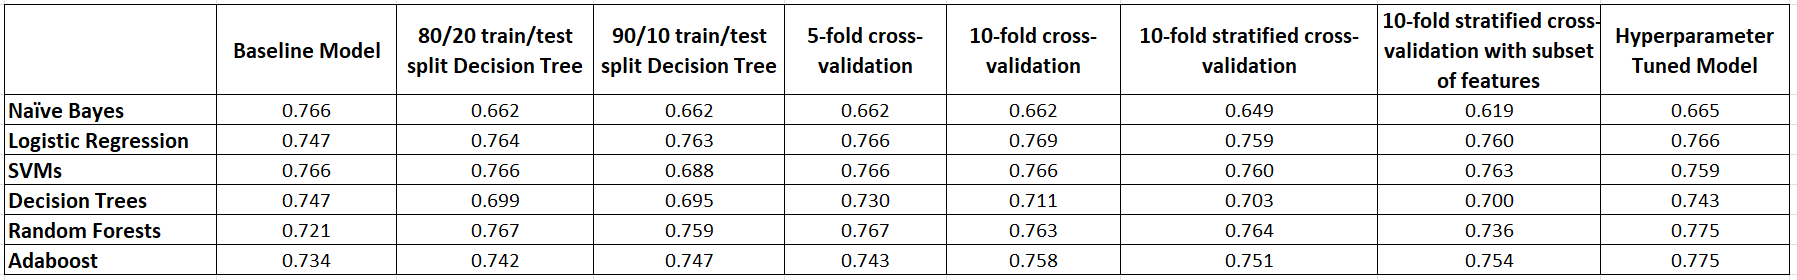

*   Kappa Score
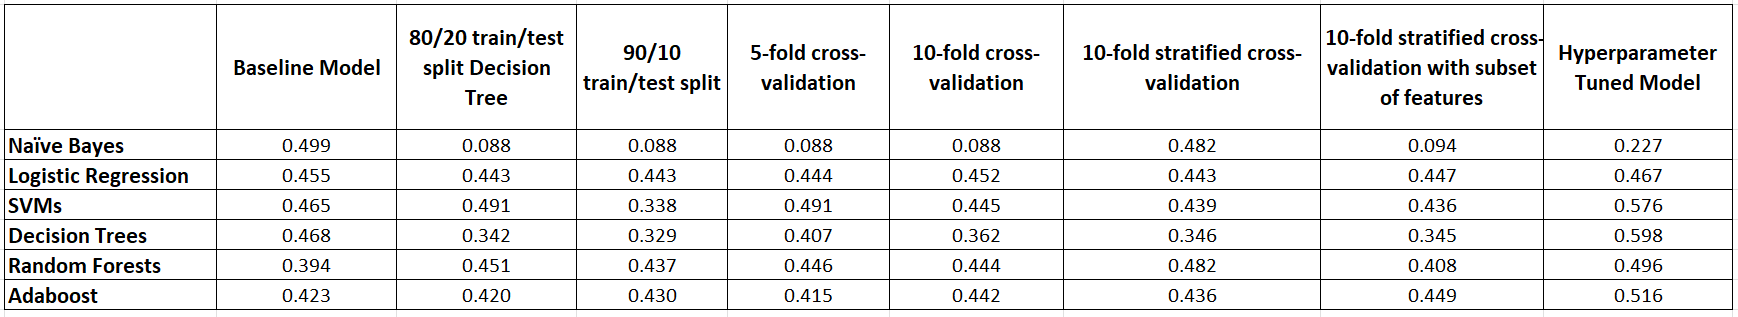



**2. Based on your table, which baseline model performed best? (5 points)**

In baseline model, Naive Bayes is the best model with the highest accuracy (0.766) and kappa score (0.499)


**3. For each algorithm, which model performed best (out of the 7 optimizations + 1 baseline model)? Please create a table -- column 1 - agorithms; column 2 - best performing optimization (or baseline model) (5 points)**

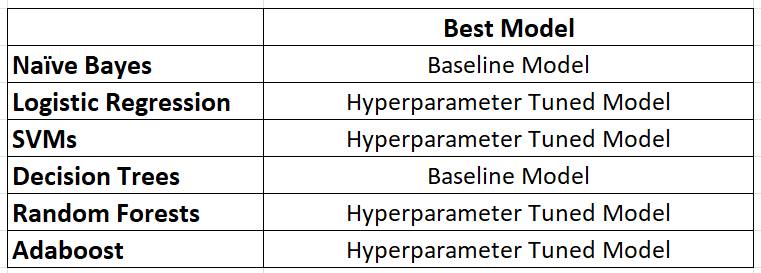

**4. Overall, which model performed the best? (5 points)**

Overall, the hyperparameter tuned models class perfoms the best. But it is hard in the class to determine which model performed the best, there are models with higher accuracy but lower Kappa Scores, and models with higher Kapper score but lower accuracy.

Accuracy is a common metric for classification tasks, but it may not always provide the best insight into a model's performance, especially when dealing with imbalanced datasets. In such cases, the model might achieve a high accuracy by simply predicting the majority class, which wouldn't necessarily make it a good model.

Cohen's Kappa, on the other hand, takes into account the agreement between the model's predictions and the true labels that would be expected by chance. It provides a more balanced view of the model's performance, particularly in cases where the dataset is imbalanced or the cost of false positives and false negatives is different.

If we look at accuracy, then it is the Adaboost model with hyperparameter tunning performed the best with 0.78 accuracy, If we look at Kapa score, then it is the Decision trees model with 0.60 Kappa score performed the best.

# Part 4: Unsupervised learning (45 points)

**1. Using principal component analysis, generate a dimensionality-reduced representation of the university dataset. Use all the standardized features (not the subset). (5 points)**


In [ ]:
#insert code
# Separate the features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Create a new dataframe with the reduced features
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Outcome'] = y

**2. Vary the number of components from 2 to 10. What percentage of variance is explained at each number of components? (5 points)**

In [ ]:
for n in range(2, 9):
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X_std)
    var_explained = sum(pca.explained_variance_ratio_)
    print(f'{n} components: {var_explained*100:.2f}% variance explained')

2 components: 47.82% variance explained
3 components: 60.69% variance explained
4 components: 71.63% variance explained
5 components: 81.16% variance explained
6 components: 89.70% variance explained
7 components: 94.94% variance explained
8 components: 100.00% variance explained


**3. Set the number of components to 2. Which features load together with high weight in each component? Make sure to explore each component individually. (5 points)**

**insert answer here**

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)
loadings_df = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=X.columns)
# Top 3 features with high weight in PC1
pc1_loadings = loadings_df['PC1'].abs().sort_values(ascending=False).head(3)
print(f'Top features in PC1:\n{pc1_loadings}')

# Top 3 features with high weight in PC2
pc2_loadings = loadings_df['PC2'].abs().sort_values(ascending=False).head(3)
print(f'Top features in PC2:\n{pc2_loadings}')

Top features in PC1:
BMI              0.451941
SkinThickness    0.439824
Insulin          0.435026
Name: PC1, dtype: float64
Top features in PC2:
Age              0.620589
Pregnancies      0.593786
SkinThickness    0.331965
Name: PC2, dtype: float64


**4. Using the best overall performing model (from Part 3, Q4), execute the same model. This time, use the same label, but replace the features with the two principle components. (5 points)**

*report the accuracy score and cohen kappa*

Accuracy: 0.72
Cohen's Kappa: 0.34


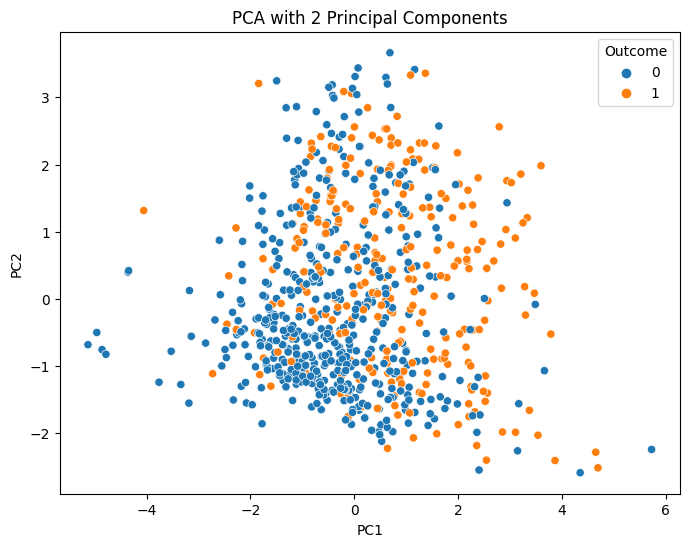

In [ ]:
#insert code here

# Separate the features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Create the logistic regression model using the principal components
model = LogisticRegression()
model.fit(X_pca, y)

y_pred = model.predict(X_pca)

# Calculate accuracy and Cohen's Kappa
accuracy = accuracy_score(y, y_pred)
kappa = cohen_kappa_score(y, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f"Cohen's Kappa: {kappa:.2f}")

pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Outcome'] = y

fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Outcome', data=pca_df, ax=ax)
ax.set_title('PCA with 2 Principal Components')
plt.show()

**5. How did the model accuracy using the two principal components compare to the model using all of the features? (5 points)**

The Model accuracy using two principle components is 0.72, with a Cohen's Kappa of 0.34. Whereas the Logistic regression model with hyperparameter tunning using all features has about 0.77 accuracy and a
Kappa score of 0.47. The original model without using PCA runs comparatively better.

In [ ]:
# Use the model to predict the labels of the test set
y_pred = model.predict(X_pca)

# Calculate accuracy score and Cohen's kappa
acc_score = accuracy_score(y, y_pred)
kappa_score = cohen_kappa_score(y, y_pred)

print("Accuracy Score: ", acc_score)
print("Cohen's Kappa Score: ", kappa_score)

Accuracy Score:  0.71875
Cohen's Kappa Score:  0.3386489762071825


**6. Tune a K-means cluster model on this dataset, using the standardized features. In particular, tune the number of clusters *K* to a level that, in your best judgment, produces representative clusters and appropriate complexity (5 points)**

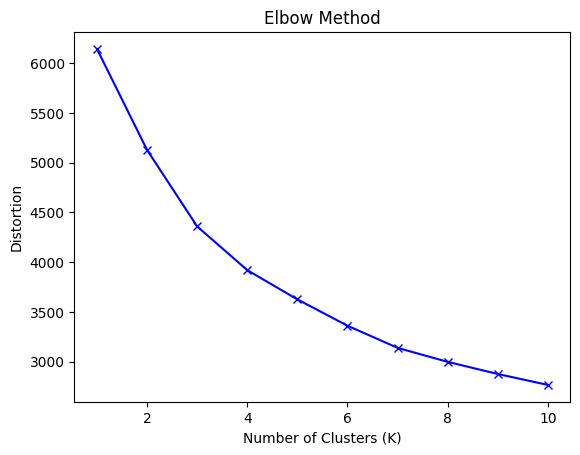

In [ ]:
#insert code here
# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Determine the appropriate number of clusters K using the elbow method
distortions = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_std)
    distortions.append(kmeans.inertia_)

plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

**7. Fit the model (5 points)**

In [ ]:
#insert code here

# Train the K-means model using the chosen value of K
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_std)

# Evaluate the performance of the model
y_pred = kmeans.predict(X_std)
score = silhouette_score(X_std, y_pred)

print("Silhouette Score: ", score)

Silhouette Score:  0.17954310409084448


**8. Calculate cluster statistics to see how they are differentiated from each other (5 points)**

In [ ]:
#insert code here
# Add the predicted cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_

# Calculate the mean value of each feature for each cluster
cluster_stats = df.groupby('Cluster').mean()

cluster_stats

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Cluster,,,,,,,,,
0,7.488372,130.390698,77.260465,14.479070,35.627907,32.538140,0.456898,46.730233,0.502326
1,2.293769,103.370920,61.130564,15.240356,36.038576,28.496736,0.399285,26.305638,0.148368
2,2.638889,138.782407,73.430556,34.828704,192.041667,36.903704,0.600042,30.634259,0.509259


**9. Visualize the clusters -- make sure the binary indicator you created for your label is colored differently (5 points)**

HINT: I want to see if your clusters are **really** differentiating

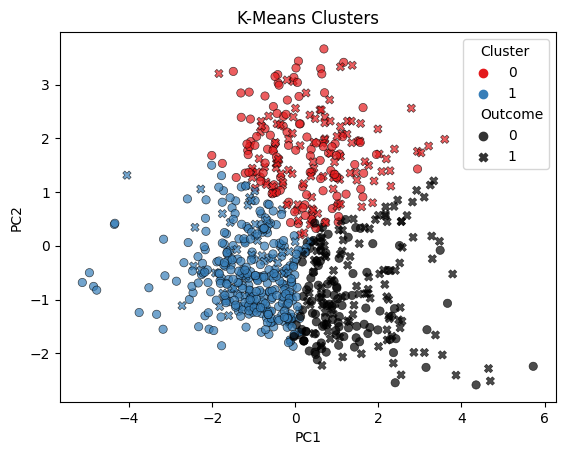

In [ ]:
#insert code here
# Add the predicted cluster labels and binary indicator to the principal components dataframe
pca_df['Cluster'] = kmeans.labels_
pca_df['Outcome'] = y

# Define the colors for each label value of the binary indicator variable
colors = {0: 'blue', 1: 'red'}

# Map the colors to the Outcome column using the colors dictionary
color_map = pca_df['Outcome'].map(colors)

# Create the scatter plot
sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue='Cluster', palette='Set1', style='Outcome', hue_order=[0, 1], style_order=[0, 1], markers=['o', 'X'], hue_norm=(0, 3), edgecolor='black', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clusters')
plt.show()